URL:https://www.kaggle.com/code/tarundirector/rev-rain-pred-eda-time-series-ai-news

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
from IPython.display import display, HTML
from io import BytesIO
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e3/sample_submission.csv
/kaggle/input/playground-series-s5e3/train.csv
/kaggle/input/playground-series-s5e3/test.csv
/kaggle/input/rainfall-prediction-using-machine-learning/Rainfall.csv


# <span style="color:#ffffff; font-size: 1%;">[1] 🌧️ Introduction</span>

<div style=" border-bottom: 8px solid #FFD700; overflow: hidden; border-radius: 10px; height: 45px; width: 100%; display: flex;">
  <div style="height: 100%; width: 65%; background-color: #7851A9; float: left; text-align: center; display: flex; justify-content: center; align-items: center; font-size: 25px; ">
    <b><span style="color: #FFFFFF; padding: 20px 20px;">[1] 🌧️⚡ Introduction</span></b>
  </div>
  <div style="height: 100%; width: 35%; background-image: url('https://images.theconversation.com/files/436774/original/file-20211209-172173-1watr8u.jpg?ixlib=rb-4.1.0&rect=7%2C29%2C4881%2C3224&q=20&auto=format&w=320&fit=clip&dpr=2&usm=12&cs=strip'); background-size: cover; background-position: center; float: left; border-top-right-radius: 10px; border-bottom-right-radius: 4px;">
  </div>
</div>

In [157]:
url = "https://img.freepik.com/free-photo/beautiful-city-view_23-2151002674.jpg"

html_code = f'''
<img src="{url}" style="width:100%; height:300px; object-fit: cover; border-radius: 20px;">
'''
display(HTML(html_code))

Welcome to my notebook for the Rainfall Prediction Challenge from the 2025 Kaggle Playground Series! ☔🏆 This competition provides a great opportunity to work with tabular data, experiment with feature engineering, and refine machine learning models to predict the probability of rainfall.

In this notebook, we will:

1. **Perform Exploratory Data Analysis (EDA) 📊** – Analyze trends, visualize distributions, and handle missing values.
2. **Build and Compare Machine Learning Models 🤖** – Train and evaluate different classification models for rainfall prediction.
3. **Optimize Hyperparameters ⚙️** – Fine-tune models for improved accuracy.
4. **Generate and Submit Predictions 📤** – Submit our best model’s probability predictions to Kaggle.

We’ll also explore whether incorporating the original dataset can enhance model performance. Let’s dive in and make some accurate rainfall predictions! 🌧️💡

📌 **Check out my other notebooks**:

- 📘 **S5E4**: [🎙️ Podcast Pred | 🎧 EDA & XGB | AI News 🌟](https://www.kaggle.com/code/tarundirector/podcast-pred-eda-xgb-ai-news)  
- 🎒 **S5E2**: [Backpack Prediction | Baseline + Ensemble + EDA 📊](https://www.kaggle.com/code/tarundirector/backpack-pred-baseline-ensemble-eda)

> **📝 NOTE:** This notebook is **aimed at absolute beginners** who want to step into the world of **Kaggling and Data Science**. I’ve kept things **pretty basic** to make it easier to follow, but I’ll be **updating and improving** everything as I get time. 🚀  
> That said, I **apologize in advance** if I’m a bit slow or if I make mistakes—**I’m not an expert yet**, just someone eager to **learn, experiment, and grow** with the right feedback! So, feel free to drop suggestions, and let’s make this a **learning journey together!** 😊

<span style="color: #000000; background-color: #FEF9E7; padding: 20px; font-size: 18px; border-left: 8px solid #D4AC0D"><strong>🚀 New Addition: AI News Updates!</strong></span>

Since **Kaggle Playground competitions** run all year long, I thought it would be fun to add a **dedicated AI News section** at the end of my notebooks. I'll be **updating it every 2-3 days** to keep you all in the loop with the **latest AI developments**—because let’s be real, AI moves *fast*! ⚡  

If you think this **doesn’t align with the Kaggle spirit** or have any feedback, feel free to **drop a comment!** 💬  

📌 **Shortcut:** You can jump straight to the AI News section by [clicking over here](#🤖-AI-News) or [visit my blog](https://tarundirector.github.io/tarunmishra.github.io/). Also, keep checking back for more **competition updates** and insights! 🚀

> 💡 **Quick Tip**:
"Click on 'Show hidden code' snippets to reveal the code behind the results!" 👀💻

In [158]:

#🔍 Ah-ha! You found the secret sauce! 🍔

<div style="background-color: #FEF9E7; border-left: 8px solid #D4AC0D; padding: 20px; border-radius: 8px; font-size: 14px; color: #000000;">
    <h4><strong> LOOK OUT FOR -> </strong></h4>
    <h5 style="font-size: 16px; margin-bottom: 10px; background-color: #F7DC6F; padding: 8px; border-radius: 4px; color: #000000;">
        <strong>💡 New Terms Alert:</strong> <em>Expand Your Data Science Vocabulary!</em>
    </h5>
    <p><em>Get familiar with key data science terms to deepen your understanding of concepts. 📖</em></p>
    <h5 style="font-size: 16px; margin-bottom: 10px; background-color: #F7DC6F; padding: 8px; border-radius: 4px; color: #000000;">
        <strong>💡 Quick Code Bite:</strong> <em>Learn One Line at a Time!</em>
    </h5>
    <p><em>Discover simple yet powerful Python snippets to enhance your workflow. 🚀</em></p>
</div>

<div style="background-color:  #E8F8F5; border-left: 8px solid #1ABC9C; padding: 20px; border-radius: 8px; font-size: 16px; color: #000000;">
  <h3 style="font-size: 16px; margin-bottom: 10px;"><strong>LOOK OUT FOR -> 🤔💁‍♀️So What?! :  🔍 Insights & Observations</strong></h3>
  <p> <em>Insights to understand the analysis and reach meaningful conclusions about the data!</em> 📊</p>

</div>


🔽 [Jump to Dataset Overview 🔍](#Dataset-Overview)  
🔽 [Jump to EDA 💡](#EDA)  
🔽 [Jump to Data Preprocessing 🧹](#Data-Preprocessing)  
🔽 [Jump to Modelling & Evaluation 🏗️](#Modelling)  
🔽 [Jump to AI News 🤖](#🤖-AI-News)  

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [1.1] 🌧️ Problem Statement</span></b>

Predict the **probability of rainfall** for each entry in the **test dataset** by leveraging **historical weather patterns** from the training data. The objective is to build a **robust classification model** that accurately estimates the **`rainfall` column values** for unseen data.

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [1.2] 🚀 Goal </span></b>

Our goal is to **predict the 'rainfall' target feature values** (binary: 0 = no rain, 1 = rain) for each day of the year and **maximize AUC-ROC** by selecting meaningful features, experimenting with different classification models, and fine-tuning hyperparameters to improve predictive performance. 🌧️📈

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [1.3] 🗂 Dataset Description</span></b>

The dataset used in this competition has been **synthetically generated** from a deep learning model trained on the **Rainfall Prediction using Machine Learning** dataset. While the feature distributions are similar, they are not identical to the original dataset. You are encouraged to explore the original dataset to identify differences and assess whether incorporating it into training enhances model performance.

📁 **Files Provided:**

1. **train.csv 📄** – The training dataset, containing various weather-related features along with the binary target variable (rainfall: 1 for rain, 0 for no rain).  
2. **test.csv 📄** – The test dataset, where we need to predict the probability of rainfall for each row based on given features.  
3. **sample_submission.csv 📄** – A sample submission file in the correct format for reference.

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [1.4] 📏 Evaluation Metric – AUC-ROC</span></b>

Submissions in this competition are evaluated based on the **Area Under the Receiver Operating Characteristic Curve (AUC-ROC)**, which measures how well the predicted probabilities distinguish between rainy and non-rainy days.  

![image.png](https://github.com/user-attachments/assets/fd313479-5fe8-4250-85f3-f8c3bf5ec49e)

### **🔍 Explanation of AUC and Related Terms**

#### **1️⃣ AUC (Area Under the Curve)**
- Measures how well a model differentiates between **positive** and **negative** classes.
- The AUC score is computed by summing up the contributions of each segment in the **ROC Curve**.
- A **higher AUC** indicates a better model.

#### **2️⃣ TPR (True Positive Rate) / Recall**
- **Definition:** The proportion of actual positive cases correctly identified by the model.
- **Formula:** `TPR = TP / (TP + FN)`
- **Interpretation:** A **higher TPR** means the model detects more actual positives.

#### **3️⃣ FPR (False Positive Rate)**
- **Definition:** The proportion of negative cases incorrectly classified as positive.
- **Formula:** `FPR = FP / (FP + TN)`
- **Interpretation:** A **lower FPR** is preferred as it indicates fewer false alarms.

#### **4️⃣ (FPRᵢ - FPRᵢ₋₁)**
- Represents the **change in the False Positive Rate** between consecutive points on the ROC curve.
- Used to determine the width of each segment in the summation process.

#### **5️⃣ TPRᵢ**
- Represents the **True Positive Rate** at a given threshold.
- Multiplied by `(FPRᵢ - FPRᵢ₋₁)` to compute the area contribution for each segment.

---

### **📌 Python Library for AUC Calculation**
To compute **AUC**, you can use the **Scikit-Learn (`sklearn.metrics`)** library.

#### **Syntax:**
```
from sklearn.metrics import roc_auc_score
roc_auc_score(y_true, y_scores)
```
- **`y_true`** → Actual class labels (0 or 1).
- **`y_scores`** → Model's predicted probabilities.

This function directly computes the **AUC** by integrating the ROC curve.

---

### 🏆 **What Does This Mean?**
The formula approximates **AUC** by summing up the **trapezoidal areas** between consecutive points on the **ROC curve**. A **higher AUC** means a **better model** at distinguishing between classes! 🚀

⚡ **AUC Score (0 to 1 Scale):**  
   - **AUC = 1.0** → Perfect classification.  
   - **AUC > 0.90** → Excellent model.  
   - **AUC = 0.50** → Random guessing.  
   - **AUC < 0.50** → Worse than random.

# <span style="color:#ffffff; font-size: 1%;">[2] 🔍 Dataset Overview</span>
### <span style="color:#ffffff; font-size: 1%;">Dataset Overview</span>

<div style=" border-bottom: 8px solid #FFD700; overflow: hidden; border-radius: 10px; height: 45px; width: 100%; display: flex;">
  <div style="height: 100%; width: 65%; background-color: #7851A9; float: left; text-align: center; display: flex; justify-content: center; align-items: center; font-size: 25px; ">
    <b><span style="color: #FFFFFF; padding: 20px 20px;">[2] 📊🔍 Dataset Overview</span></b>
  </div>
  <div style="height: 100%; width: 35%; background-image: url('https://images.theconversation.com/files/436774/original/file-20211209-172173-1watr8u.jpg?ixlib=rb-4.1.0&rect=7%2C29%2C4881%2C3224&q=20&auto=format&w=320&fit=clip&dpr=2&usm=12&cs=strip'); background-size: cover; background-position: center; float: left; border-top-right-radius: 10px; border-bottom-right-radius: 4px;">
  </div>
</div>

🔽 [Jump to 🤔💁‍♀️So What?! (📊 Dataset Observations)](#SW-Dataset-Observations) 

---

🔽 [Jump to EDA 💡](#EDA)  
🔽 [Jump to Data Preprocessing 🧹](#Data-Preprocessing)  
🔽 [Jump to Modelling & Evaluation 🏗️](#Modelling)  
🔽 [Jump to AI News 🤖](#🤖-AI-News)  

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [2.1] Loading the Datasets & Libraries</span></b>

In [159]:
# Importing Libraries

import warnings
warnings.filterwarnings("ignore")

import optuna
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVC
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, median_absolute_error
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import KFold
from scipy import stats
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import catboost as cb
from scipy.optimize import minimize
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, classification_report, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import TimeSeriesSplit

In [160]:
# Reading .csv data file
train_data = pd.read_csv("/kaggle/input/playground-series-s5e3/train.csv")
test_data = pd.read_csv("/kaggle/input/playground-series-s5e3/test.csv")
original_data = pd.read_csv('/kaggle/input/rainfall-prediction-using-machine-learning/Rainfall.csv')

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [2.2] Initial Observations or Trends</span></b>

In [161]:
train_data.sample(5)

id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
701    701  337    1023.4     16.6         15.8     13.7      11.9      77.0   
139    139  140    1008.0     32.8         29.9     26.7      26.7      89.0   
765    765   36    1022.7     15.4         13.3     11.4       9.7      79.0   
2049  2049  225    1006.0     28.9         26.1     24.6      24.9      82.0   
1775  1775  316    1018.0     21.5         20.9     19.3      19.3      91.0   

      cloud  sunshine  winddirection  windspeed  rainfall  
701    77.0       2.5           70.0       25.2         0  
139    74.0       6.1          230.0       15.8         1  
765    88.0       0.0           20.0       25.2         1  
2049   81.0       6.5          240.0        9.1         1  
1775   84.0       1.1           70.0       33.4         1

In [162]:
test_data.sample(5)

id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
445  2635   81    1011.3     21.5         19.6     18.1      16.3      95.0   
311  2501  312    1017.4     23.4         20.4     18.9      18.2      82.0   
5    2195    6    1027.1     15.6         12.6     11.5       9.0      76.0   
448  2638   84    1008.9     20.3         18.3     15.8      13.1      75.0   
624  2814  260    1005.7     30.7         27.6     26.8      25.3      93.0   

     cloud  sunshine  winddirection  windspeed  
445   95.0       0.0           60.0       30.6  
311   87.0       0.6           70.0       29.7  
5     94.0       0.0           20.0       41.4  
448   88.0       0.3           30.0       24.3  
624   88.0       0.2          200.0       35.6

In [163]:
original_data.sample(5)

day  pressure   maxtemp  temparature  mintemp  dewpoint  humidity   \
309    5     1016.1     28.2         25.8     24.5      22.0         80   
279    6     1014.1     26.8         26.0     25.3      25.4         97   
114   24     1008.7     26.1         24.4     23.2      23.2         93   
75    16     1015.0     16.3         15.3     14.1      13.6         90   
96     6     1013.3     26.5         23.1     21.5      21.6         91   

     cloud  rainfall  sunshine           winddirection  windspeed  
309      82      yes       6.5                    70.0       28.3  
279      86      yes       0.4                   100.0       30.4  
114      84      yes       1.4                   190.0        8.5  
75      100      yes       0.0                    60.0       33.2  
96       83       no       6.9                    70.0       20.0

In [164]:
original_data.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

> **⚠️ NOTE:** Some feature names in the dataset, such as **'pressure  '**, **'humidity  '**, and **'        winddirection'**, contain **unwanted spaces** at the beginning or end. These spaces need to be removed to avoid issues during data processing and model training. We’ll clean them up to ensure smooth and efficient data handling!⚠️  

In [165]:
# Removing spaces at the start and end of column names
original_data.columns = original_data.columns.str.strip()

> **⚠️ NOTE:** In the original dataset, the **'rainfall'** feature uses **'Yes'** and **'No'** instead of binary values (0 and 1). To ensure consistency, we need to convert these categorical labels into numerical values, where **'yes' = 1** and **'no' = 0**.⚠️

<div style="background-color: #FEF9E7; border-left: 8px solid #D4AC0D; padding: 20px; border-radius: 8px; font-size: 14px; color: #000000;">
  <h5 style="font-size: 16px; margin-bottom: 10px; background-color: #F7DC6F; padding: 8px; border-radius: 4px; color: #000000;">
    <strong>💡 Quick Code Bite:</strong> <em>Learn One Line at a Time!</em>
  </h5>
  
  <ul>
    <li><strong>.sample()</strong> → <em>Picks random rows from your DataFrame—like drawing a lucky ticket!</em> 🎟️</li>
    <li><strong>.columns</strong> → <em>Lists all column names—your dataset’s table of contents!</em> 📖</li>
    <li><strong>.str.strip()</strong> → <em>Cleans up extra spaces from text data—no more sneaky whitespace!</em> ✂️</li>
    <li><strong>.map({'key': value})</strong> → <em>Replaces values in a column based on a dictionary—like a quick data makeover!</em> 🎭</li>
  </ul>
</div>

In [166]:
# Converting 'rainfall' column to binary format
original_data['rainfall'] = original_data['rainfall'].map({'yes': 1, 'no': 0})

In [167]:
# Checking the number of rows and columns

num_train_rows, num_train_columns = train_data.shape

num_test_rows, num_test_columns = test_data.shape

num_original_rows, num_original_columns = original_data.shape

print("Training Data:")
print(f"Number of Rows: {num_train_rows}")
print(f"Number of Columns: {num_train_columns}\n")

print("Test Data:")
print(f"Number of Rows: {num_test_rows}")
print(f"Number of Columns: {num_test_columns}\n")

print("Original Data:")
print(f"Number of Rows: {num_original_rows}")
print(f"Number of Columns: {num_original_columns}")

Training Data:
Number of Rows: 2190
Number of Columns: 13

Test Data:
Number of Rows: 730
Number of Columns: 12

Original Data:
Number of Rows: 366
Number of Columns: 12


In [168]:
# Creating a table for missing values, unique values and data types of the features

missing_values_train = pd.DataFrame({'Feature': train_data.columns,
                              '[TRAIN] No. of Missing Values': train_data.isnull().sum().values,
                              '[TRAIN] % of Missing Values': ((train_data.isnull().sum().values)/len(train_data)*100)})

missing_values_test = pd.DataFrame({'Feature': test_data.columns,
                             '[TEST] No.of Missing Values': test_data.isnull().sum().values,
                             '[TEST] % of Missing Values': ((test_data.isnull().sum().values)/len(test_data)*100)})

missing_values_original = pd.DataFrame({'Feature': original_data.columns,
                             '[ORIGINAL] No.of Missing Values': original_data.isnull().sum().values,
                             '[ORIGINAL] % of Missing Values': ((original_data.isnull().sum().values)/len(original_data)*100)})

unique_values = pd.DataFrame({'Feature': train_data.columns,
                              'No. of Unique Values[FROM TRAIN]': train_data.nunique().values})

feature_types = pd.DataFrame({'Feature': train_data.columns,
                              'DataType': train_data.dtypes})

merged_df = pd.merge(missing_values_train, missing_values_test, on='Feature', how='left')
merged_df = pd.merge(merged_df, missing_values_original, on='Feature', how='left')
merged_df = pd.merge(merged_df, unique_values, on='Feature', how='left')
merged_df = pd.merge(merged_df, feature_types, on='Feature', how='left')

merged_df.style.background_gradient(cmap='viridis')

In [169]:
# Count duplicate rows in train_data
train_duplicates = train_data.duplicated().sum()

# Count duplicate rows in test_data
test_duplicates = test_data.duplicated().sum()

# Count duplicate rows in original_data
original_duplicates = original_data.duplicated().sum()

# Print the results
print(f"Number of duplicate rows in train_data: {train_duplicates}")
print(f"Number of duplicate rows in test_data: {test_duplicates}")
print(f"Number of duplicate rows in original_data: {original_duplicates}")

Number of duplicate rows in train_data: 0
Number of duplicate rows in test_data: 0
Number of duplicate rows in original_data: 0


In [170]:
# Having a look at the description of all the numerical columns present in the dataset
print('Description of all the numerical columns present in the train dataset')
train_data.describe().T.style.background_gradient(cmap='viridis')

Description of all the numerical columns present in the train dataset


In [171]:
# Having a look at the description of all the numerical columns present in the dataset
print('Description of all the numerical columns present in the test dataset')
test_data.describe().T.style.background_gradient(cmap='viridis')

Description of all the numerical columns present in the test dataset


In [172]:
# Having a look at the description of all the numerical columns present in the dataset
print('Description of all the numerical columns present in the original dataset')
original_data.describe().T.style.background_gradient(cmap='viridis')

Description of all the numerical columns present in the original dataset


> **⚠️ NOTE:** In the training dataset, the **'days'** column represents the **day of the year** (ranging from 1 to 365), while in the original dataset, the **'day'** column refers to the **day component of the date** (ranging from 1 to 31). Additionally, the original dataset corresponds to a **leap year (366 days)**, whereas the training data spans **six years of 365 days each**, and the test data covers a **two-year period with 365 days per year**. To ensure consistency in time-based analysis, we **convert the 'day' column in the original dataset to a day-of-year format (1-366)**. ⚠️

In [173]:
original_data['day'] = range(1, len(original_data) + 1)
original_data['day'].describe()

count    366.000000
mean     183.500000
std      105.799338
min        1.000000
25%       92.250000
50%      183.500000
75%      274.750000
max      366.000000
Name: day, dtype: float64

<div style="background-color: #FEF9E7; border-left: 8px solid #D4AC0D; padding: 20px; border-radius: 8px; font-size: 14px; color: #000000;">
  <h5 style="font-size: 16px; margin-bottom: 10px; background-color: #F7DC6F; padding: 8px; border-radius: 4px; color: #000000;">
    <strong>💡 Quick Code Bite:</strong> <em>Learn One Line at a Time!</em>
  </h5>
  <ul>
    <li><strong>.isnull()</strong> → <em>Checks where data is missing—shines a spotlight on the gaps!</em> 🔍</li>
    <li><strong>.nunique()</strong> → <em>Counts unique values in a column—how many different flavors are in your dataset?</em> 🍦</li>
    <li><strong>.dtypes</strong> → <em>Shows data types of each column—tells you what kind of data you’re working with!</em> 🔢🔡</li>
    <li><strong>.duplicated().sum()</strong> → <em>Counts duplicate rows—finds copy-paste crimes in your data!</em> 🔄</li>
    <li><strong>.describe()</strong> → <em>Gives a quick summary of numerical data—stats at a glance!</em> 📊</li>
  </ul>
</div>

### <span style="color:#ffffff; font-size: 1%;">SW-Dataset-Observations</span>

<div style="background-color: #E8F8F5; border-left: 8px solid #1ABC9C; padding: 20px; border-radius: 8px; font-size: 14px; color: #000000;">
      <h3 style="font-size: 20px; margin-bottom: 10px;"> 🤔💁‍♀️So What?! <strong>(📊 Dataset Observations)</strong></h3>
  <hr>

  <p><strong>1️⃣ Dataset Shape 📂</strong></p>
  <ul>
    <li><strong>Training Data:</strong> <strong>2,190 rows × 13 columns</strong>.</li>
    <li><strong>Test Data:</strong> <strong>730 rows × 12 columns</strong>.</li>
    <li><strong>Original Data:</strong> <strong>366 rows × 12 columns</strong>.</li>
  </ul>
  <hr>

  <p><strong>2️⃣ Missing Values Analysis ❌</strong></p>
  <ul>
    <li><strong>No missing values</strong> in the training dataset.</li>
    <li>The <code>winddirection</code> feature contains <strong>one missing value</strong> in the test dataset.</li>
  </ul>
  <p>✅ <strong>Next Steps:</strong> Use <strong>mean or median imputation</strong> to handle missing values efficiently.</p>
  <hr>

  <p><strong>3️⃣ Key Observations on Data 🧐</strong></p>
  <ul>
    <li><strong>ID:</strong> A unique identifier for each record.</li>
    <li><strong>Day:</strong> Represents the <strong>day of the year (1 to 366)</strong>.</li>
    <li><strong>Pressure:</strong> Ranges from <strong>999 to 1034.6 hPa</strong>.</li>
    <li><strong>Temperature Features:</strong> Max temp (<strong>10.4°C - 36.0°C</strong>), Min temp (<strong>4.0°C - 29.8°C</strong>), and Average temp.</li>
    <li><strong>Dew Point:</strong> Ranges from <strong>-0.3°C to 26.7°C</strong>.</li>
    <li><strong>Humidity:</strong> Ranges from <strong>39% to 98%</strong>.</li>
    <li><strong>Cloud Cover:</strong> Ranges from <strong>2% to 100%</strong>.</li>
    <li><strong>Sunshine Duration:</strong> Ranges from <strong>0 to 12.1 hours</strong>.</li>
    <li><strong>Wind Speed:</strong> Ranges from <strong>4.4 km/h to 59.5 km/h</strong>.</li>
    <li><strong>Wind Direction:</strong> Categorical, with <strong>35 unique values</strong>.</li>
    <li><strong>Rainfall:</strong> Binary target variable (<strong>0 = No Rain, 1 = Rain</strong>).</li>
  </ul>
  <hr>

  <p><strong>4️⃣ Summary Statistics 📊</strong></p>
  <ul>
    <li><strong>Pressure:</strong> Mean: <strong>1013.6 hPa</strong>, Min: <strong>999.0</strong>, Max: <strong>1034.6</strong>.</li>
    <li><strong>Max Temperature:</strong> Mean: <strong>26.36°C</strong>, Min: <strong>10.4°C</strong>, Max: <strong>36.0°C</strong>.</li>
    <li><strong>Min Temperature:</strong> Mean: <strong>22.17°C</strong>, Min: <strong>4.0°C</strong>, Max: <strong>29.8°C</strong>.</li>
    <li><strong>Dew Point:</strong> Mean: <strong>20.45°C</strong>, Min: <strong>-0.3°C</strong>, Max: <strong>26.7°C</strong>.</li>
    <li><strong>Humidity:</strong> Mean: <strong>82.03%</strong>, Min: <strong>39%</strong>, Max: <strong>98%</strong>.</li>
    <li><strong>Cloud Cover:</strong> Mean: <strong>75.72%</strong>, Min: <strong>2%</strong>, Max: <strong>100%</strong>.</li>
    <li><strong>Sunshine:</strong> Mean: <strong>3.74 hours</strong>, Min: <strong>0 hours</strong>, Max: <strong>12.1 hours</strong>.</li>
    <li><strong>Wind Speed:</strong> Mean: <strong>21.8 km/h</strong>, Min: <strong>4.4 km/h</strong>, Max: <strong>59.5 km/h</strong>.</li>
    <li><strong>Rainfall:</strong> Mean: <strong>0.75</strong>, indicating <strong>~75% rainy days</strong> in the dataset.</li>
  </ul>
  <hr>

  <p><strong>5️⃣ Key Takeaways 🔍</strong></p>
  <ul>
    <li>The dataset consists of <strong>numerical weather variables</strong>, requiring appropriate <strong>scaling</strong>.</li>
    <li><code>winddirection</code> can potentially be <strong>categorical</strong> as it has a limited number of unique values and may require <strong>encoding</strong>.</li>
    <li>High <strong>variance in cloud cover and humidity</strong> suggests their importance in predicting rainfall.</li>
    <li>Rainfall distribution is <strong>imbalanced (~75% rainy days)</strong>, which should be <strong>considered in modeling</strong>.</li>
  </ul>

</div>

# <span style="color:#ffffff; font-size: 1%;">[3] 💡 Exploratory Data Analysis (EDA)</span>
### <span style="color:#ffffff; font-size: 1%;">EDA</span>

<div style=" border-bottom: 8px solid #FFD700; overflow: hidden; border-radius: 10px; height: 45px; width: 100%; display: flex;">
  <div style="height: 100%; width: 65%; background-color: #7851A9; float: left; text-align: center; display: flex; justify-content: center; align-items: center; font-size: 25px; ">
    <b><span style="color: #FFFFFF; padding: 20px 20px;">[3] 📈💡EDA</span></b>
  </div>
  <div style="height: 100%; width: 35%; background-image: url('https://images.theconversation.com/files/436774/original/file-20211209-172173-1watr8u.jpg?ixlib=rb-4.1.0&rect=7%2C29%2C4881%2C3224&q=20&auto=format&w=320&fit=clip&dpr=2&usm=12&cs=strip'); background-size: cover; background-position: center; float: left; border-top-right-radius: 10px; border-bottom-right-radius: 4px;">
  </div>
</div>

🔽 [Jump to 🤔💁‍♀️So What?! (📝 Key Features Insights)](#SW-Key-Features-Insights)  
🔽 [Jump to 🤔💁‍♀️So What?! (📝 Key Target Insights)](#SW-Target-Observations)  
🔽 [Jump to 🤔💁‍♀️So What?! (📝 Key Correlation Insights)](#SW-Correlation-Observations)  
🔽 [Jump to Time Series EDA: Detecting Trends, Seasonality & Anomalies ⏰](#Time-Series-EDA)  

---

🔽 [Jump to Data Preprocessing 🧹](#Data-Preprocessing)  
🔽 [Jump to Modelling & Evaluation 🏗️](#Modelling)  
🔽 [Jump to AI News 🤖](#🤖-AI-News)  

EDA is like peeling back the layers of a dataset to uncover hidden trends, spot inconsistencies, and extract valuable insights. Before we dive into modeling, it's crucial to **explore, visualize, and preprocess** our data to set a solid foundation for predictions.  

### 🏗️ What Our EDA Will Cover:  

1️⃣ **Understanding Numerical Features** 📊  
   - We'll **examine distributions** using histograms to see how each feature behaves.  
   - **Boxplots** will help us identify potential outliers and assess data spread.  

2️⃣ **Exploring Categorical Variables** 🔠  
   - Using **countplots**, we'll analyze category frequencies and detect imbalances.  
   - **Pie charts** will give us a quick view of category proportions within the dataset.  

3️⃣ **Analyzing the Target Variable** 🎯  
   - Since the target variable is binary (rain or no rain), we'll **check its distribution** to understand class balance.  
   - **Bar charts and KDE plots** will help visualize its relationship with other features.  

In [174]:
numerical_variables = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'windspeed']
target_variable = 'rainfall' 
categorical_variables = ['winddirection']

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [3.1] Numerical Feature Analysis <strong>(Univariate Analysis)</strong></span></b>

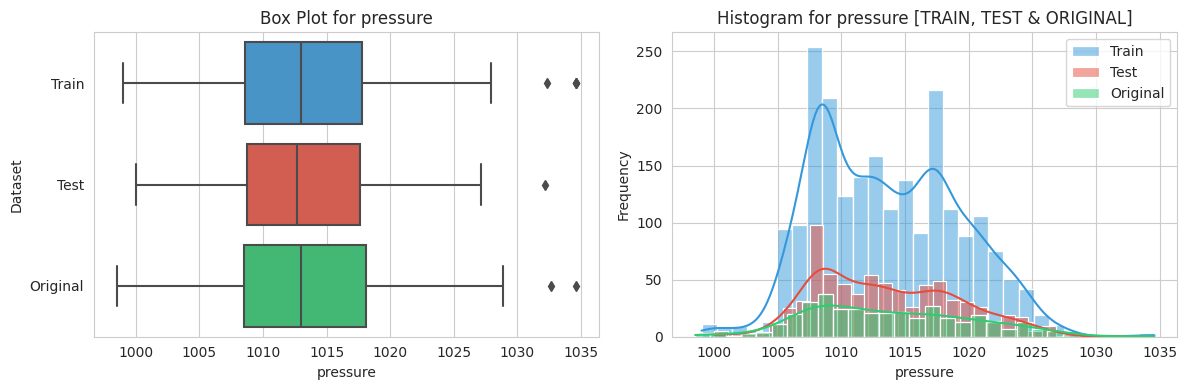

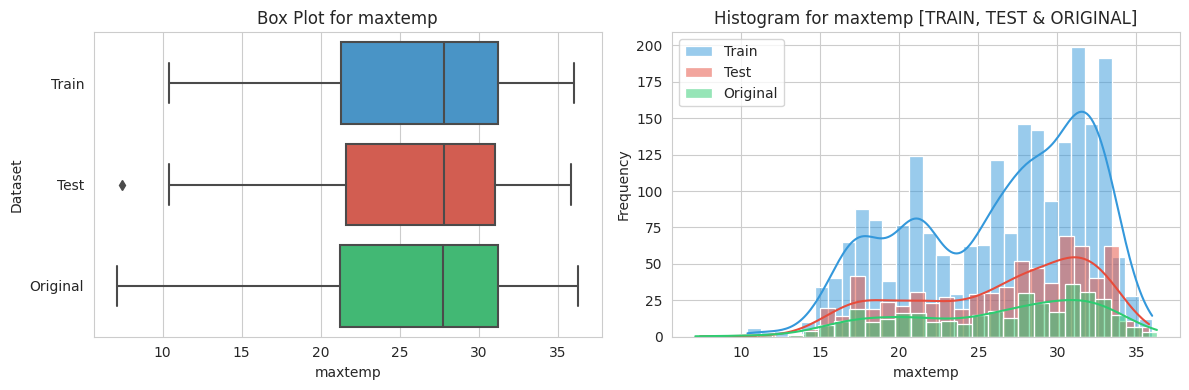

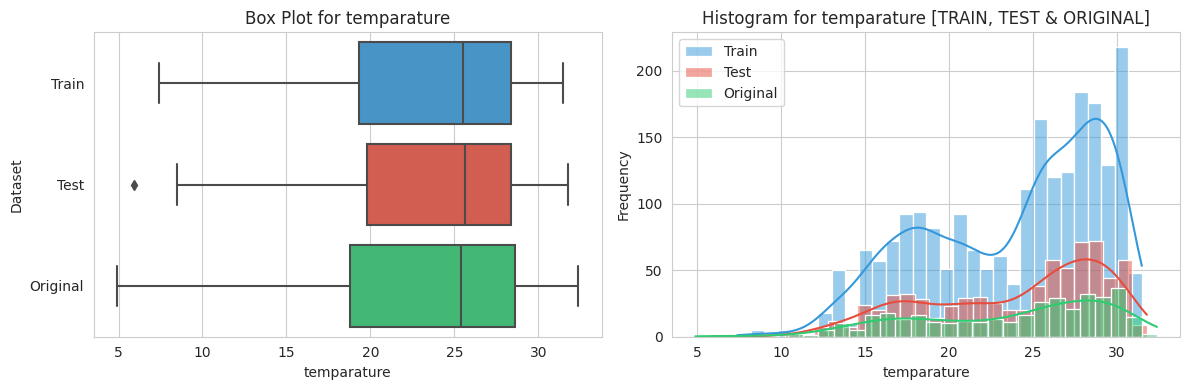

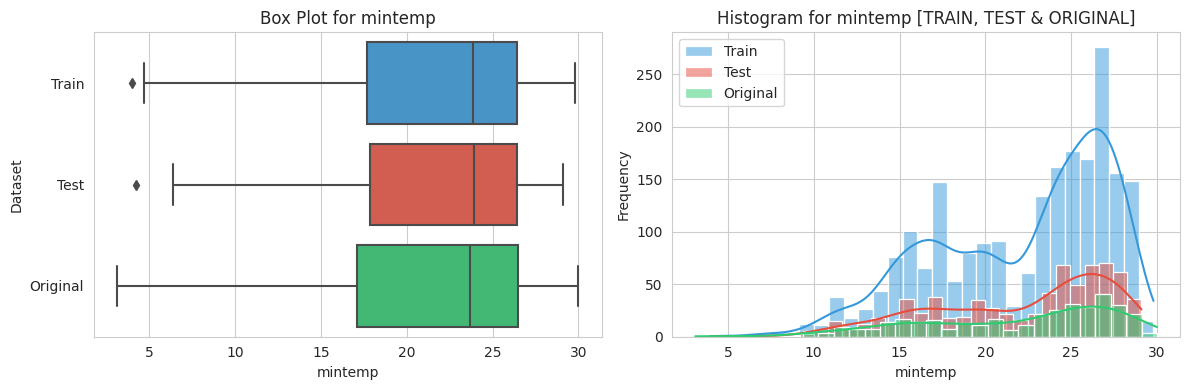

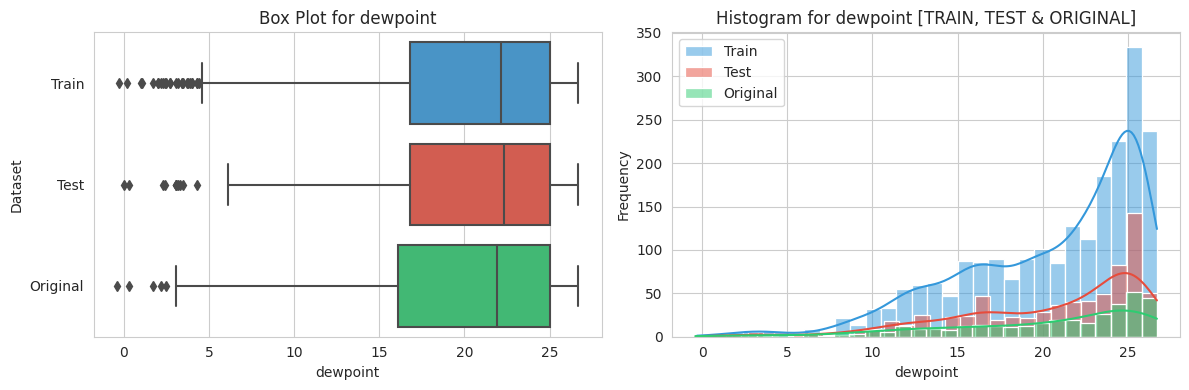

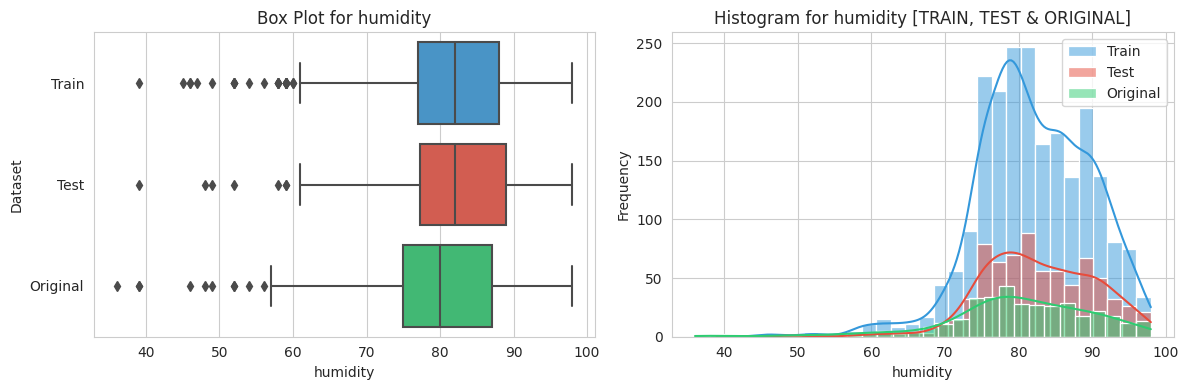

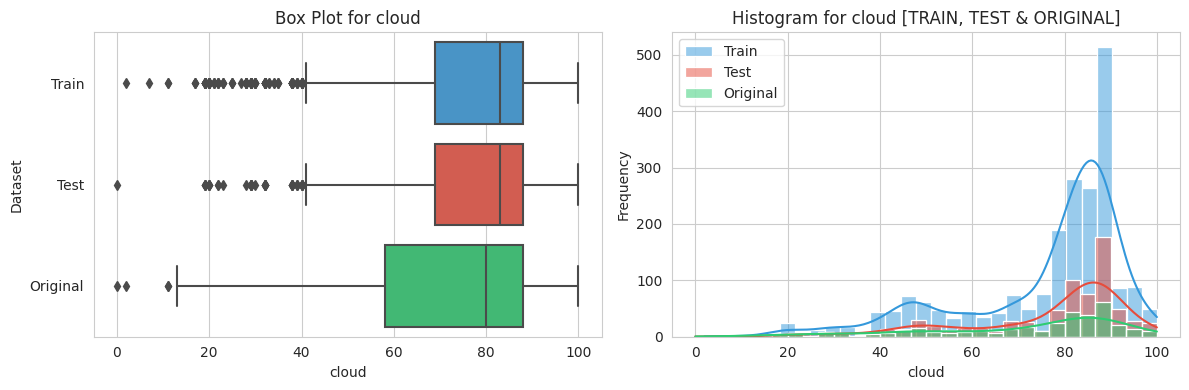

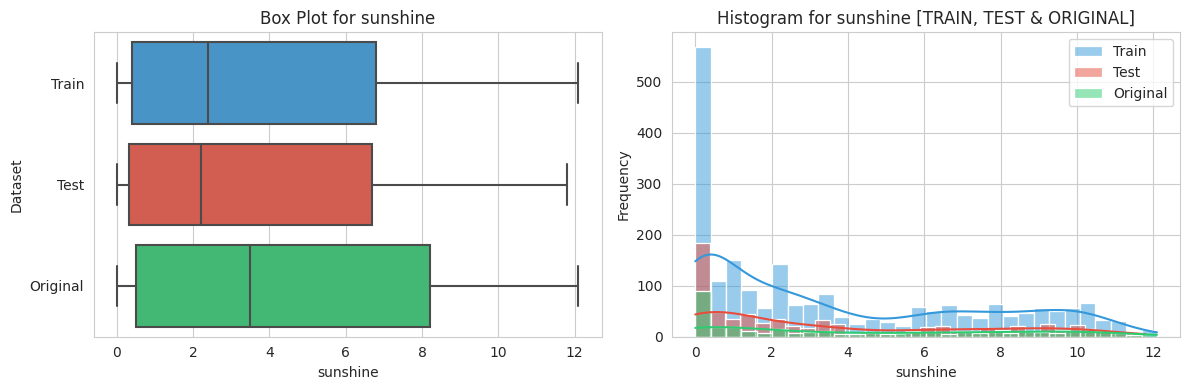

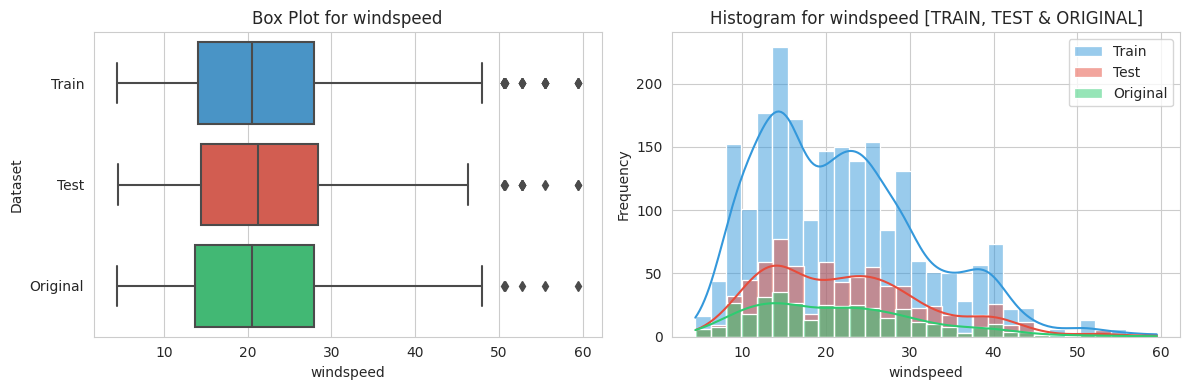

In [175]:
# Analysis of all NUMERICAL features

# Define a custom color palette
custom_palette = ['#3498db', '#e74c3c','#2ecc71']

# Add 'Dataset' column to distinguish between train and test data
train_data['Dataset'] = 'Train'
test_data['Dataset'] = 'Test'
original_data['Dataset'] = 'Original'

# Function to create and display a row of plots for a single variable
def create_variable_plots(variable):
    sns.set_style('whitegrid')
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Box plot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=pd.concat([train_data, test_data,original_data.dropna()]), x=variable, y="Dataset", palette=custom_palette)
    plt.xlabel(variable)
    plt.title(f"Box Plot for {variable}")

    # Separate Histograms
    plt.subplot(1, 2, 2)
    sns.histplot(data=train_data, x=variable, color=custom_palette[0], kde=True, bins=30, label="Train")
    sns.histplot(data=test_data, x=variable, color=custom_palette[1], kde=True, bins=30, label="Test")
    sns.histplot(data=original_data.dropna(), x=variable, color=custom_palette[2], kde=True, bins=30, label="Original")
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(f"Histogram for {variable} [TRAIN, TEST & ORIGINAL]")
    plt.legend()

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

# Perform univariate analysis for each variable
for variable in numerical_variables:
    create_variable_plots(variable)

# Drop the 'Dataset' column after analysis
train_data.drop('Dataset', axis=1, inplace=True)
test_data.drop('Dataset', axis=1, inplace=True)
original_data.drop('Dataset', axis=1, inplace=True)

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [3.2] Categorical Feature Analysis <strong>(Univariate Analysis)</strong></span></b>

> **⚠️ NOTE:** In the initial observations, the **'winddirection'** feature appears to have a **limited number of unique values**, suggesting that it can potentially be treated as a **categorical variable**. To better understand its distribution, we perform a **categorical univariate analysis**, allowing us to analyze its frequency and patterns effectively. ⚠️

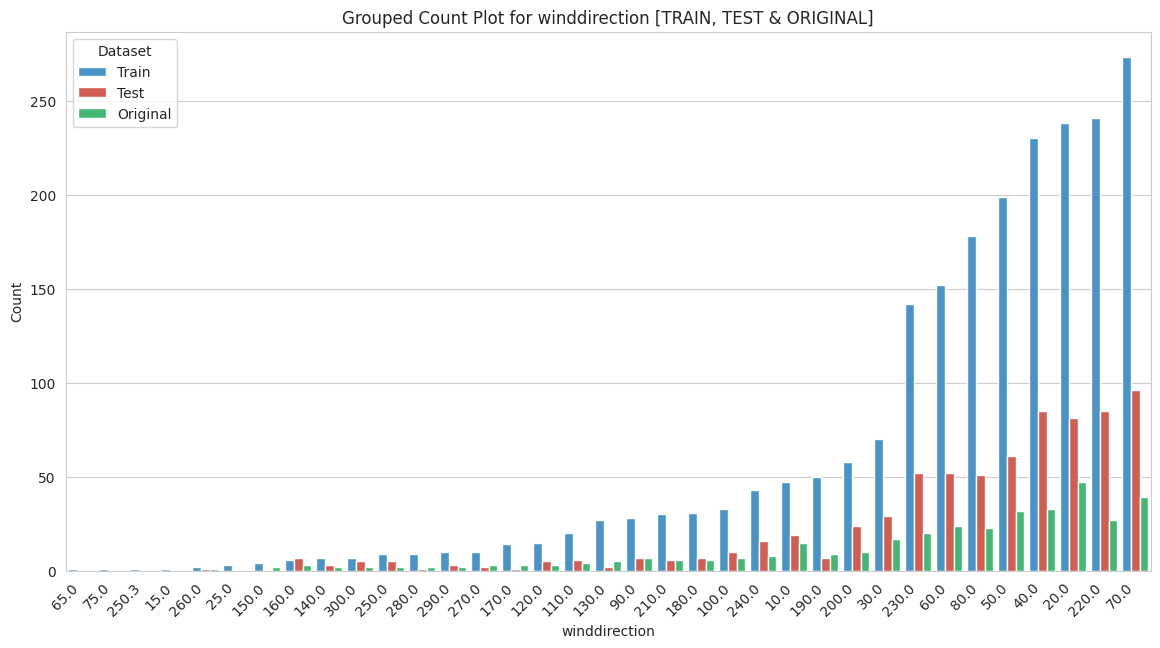

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define colors for Train, Test, and Original data
custom_palette = ['#3498db', '#e74c3c', '#2ecc71']  # Blue, Red, Green

# Function to create and display a grouped count plot for a single categorical variable
def create_categorical_barplot(variable):
    sns.set_style('whitegrid')

    # Combine the datasets and create a new column indicating the source
    train_data_copy = train_data.copy()
    test_data_copy = test_data.copy()
    original_data_copy = original_data.dropna().copy()

    train_data_copy['Dataset'] = 'Train'
    test_data_copy['Dataset'] = 'Test'
    original_data_copy['Dataset'] = 'Original'

    combined_data = pd.concat([train_data_copy, test_data_copy, original_data_copy])

    # Get sorted order of categories based on Train data count (small to big)
    train_counts = train_data[variable].value_counts().sort_values(ascending=True).index.tolist()

    # Plot grouped countplot (Horizontal bars)
    plt.figure(figsize=(14, 7))
    sns.countplot(
        data=combined_data, 
        x=variable,  # Swapped axes
        hue="Dataset", 
        palette=custom_palette, 
        dodge=True,  # Ensures grouped bars
        width=0.85,  # Further increased bar width
        order=train_counts  # Sorting categories by Train data count (small to big)
    )

    plt.ylabel("Count")
    plt.xlabel(variable)
    plt.title(f"Grouped Count Plot for {variable} [TRAIN, TEST & ORIGINAL]")
    plt.legend(title="Dataset")

    # Rotate x labels for better visibility
    plt.xticks(rotation=45, ha="right")

    # Show the plot
    plt.show()

# Perform univariate analysis for each categorical variable
for variable in categorical_variables:
    create_categorical_barplot(variable)

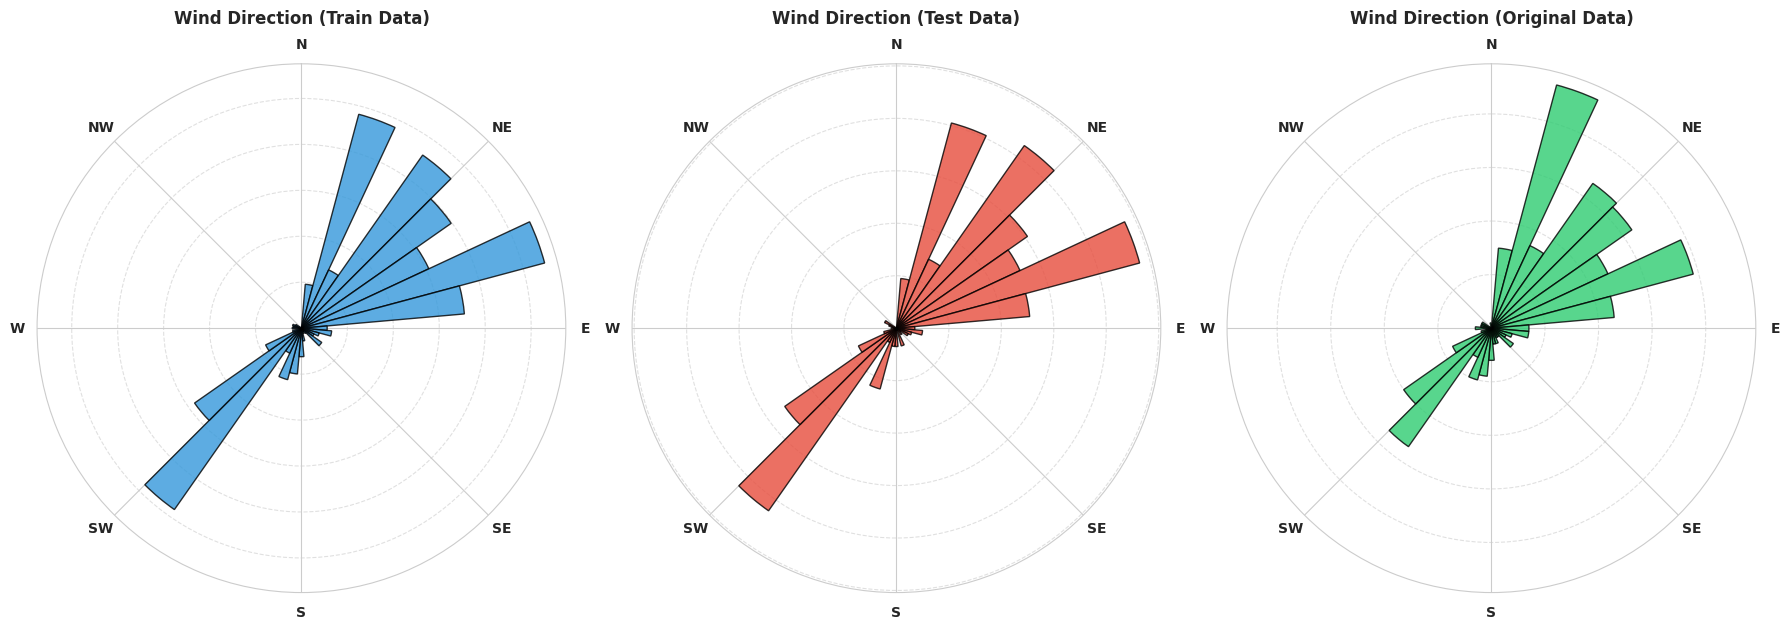

In [177]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define custom color palette for Train, Test, and Original datasets
custom_palette = ['#3498db', '#e74c3c', '#2ecc71']  # Blue, Red, Green

# Function to create Wind Rose plot in a subplot
def create_wind_rose(ax, data, dataset_name, color):
    # Convert wind direction to radians
    wind_direction_radians = np.radians(data['winddirection'].dropna())

    # Create histogram bins (every 10°)
    bins = np.linspace(0, 2*np.pi, 37)  # 36 bins (every 10°)
    counts, bin_edges = np.histogram(wind_direction_radians, bins=bins)

    # Plot on the polar axis with improved style
    bars = ax.bar(bin_edges[:-1], counts, width=np.radians(10), color=color, edgecolor='black', alpha=0.8)

    # Formatting for professional appearance
    ax.set_theta_zero_location("N")  # North is at 0°
    ax.set_theta_direction(-1)  # Clockwise
    ax.set_xticks(np.radians(np.arange(0, 360, 45)))  # Tick labels every 45°
    ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'], fontsize=10, fontweight='bold')

    # Add grid and labels for better readability
    ax.yaxis.grid(True, linestyle="--", alpha=0.6)
    ax.set_yticklabels([])  # Remove radial labels to avoid clutter
    ax.set_title(f"Wind Direction ({dataset_name})", fontsize=12, fontweight='bold', pad=10)

# Create a single row with three wind rose plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': 'polar'})

# Generate wind rose plots for Train, Test, and Original datasets
create_wind_rose(axes[0], train_data, "Train Data", custom_palette[0])  # Blue
create_wind_rose(axes[1], test_data, "Test Data", custom_palette[1])    # Red
create_wind_rose(axes[2], original_data.dropna(), "Original Data", custom_palette[2])  # Green

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#### **📌 Explanation of Wind Rose Plot**
As we have values that **involve direction**, a different kind of plot—called a **Wind Rose**—is more suitable for analyzing categorical values like **wind direction**. Unlike standard bar charts or histograms, a **polar plot (wind rose)** represents the frequency of wind directions in a circular format, maintaining the **natural cyclic nature** of directional data (0°–360°). This allows us to:
- **Preserve directional patterns** (N, NE, E, etc.).
- **Easily identify dominant wind directions**.
- **Understand wind distribution more intuitively** than a traditional bar chart.

### <span style="color:#ffffff; font-size: 1%;">SW-Key-Features-Insights</span>

<div style="background-color:  #E8F8F5; border-left: 8px solid #1ABC9C; padding: 20px; border-radius: 8px; font-size: 14px; color: #000000;">
  <h3 style="font-size: 20px; margin-bottom: 10px;"> 🤔💁‍♀️So What?! <strong>(📝 Key Insights)</strong></h3>
  <hr>

  <p><strong>1️⃣ Atmospheric Pressure (<code>pressure</code>) 🌡️</strong></p>
  <ul>
      <li>Distribution is <strong>close to normal</strong>, centered around <strong>1013 hPa</strong>.</li>
      <li>Few <strong>outliers (>1030 hPa)</strong> may indicate high-pressure systems.</li>
  </ul>
  <p>✅ <strong>Next Steps:</strong> Consider <strong>smoothing extreme values</strong>.</p>
  <hr>

  <p><strong>2️⃣ Max Temperature (<code>maxtemp</code>) ☀️</strong></p>
  <ul>
      <li>Left-skewed with <strong>two peaks</strong>, suggesting seasonal variations.</li>
      <li>A <strong>few outliers (~10°C)</strong> likely represent rare cold days.</li>
  </ul>
  <p>✅ <strong>Next Steps:</strong> Consider <strong>binning into temperature ranges</strong> to capture seasonality.</p>
  <hr>

  <p><strong>3️⃣ Average Temperature (<code>temperature</code>) 🌡️</strong></p>
  <ul>
      <li>Left-skewed with <strong>two peaks</strong>, suggesting distinct seasonal patterns.</li>
      <li>Some outliers <strong>(~7°C - 10°C)</strong> indicate rare cold spells.</li>
  </ul>
  <p>✅ <strong>Next Steps:</strong> Use <strong>season-based feature engineering</strong> for better predictions.</p>
  <hr>

  <p><strong>4️⃣ Minimum Temperature (<code>mintemp</code>) ❄️</strong></p>
  <ul>
      <li>Left-skewed distribution, indicating <strong>warm nights are more common</strong>.</li>
      <li>Some <strong>low-end outliers (~4°C - 7°C)</strong> suggest rare cold nights.</li>
  </ul>
  <p>✅ <strong>Next Steps:</strong> Consider <strong>outlier treatment</strong> to handle extreme cold values.</p>
  <hr>

  <p><strong>5️⃣ Dew Point (<code>dewpoint</code>) 💧</strong></p>
  <ul>
      <li>Left-skewed, with most values around <strong>20°C - 25°C</strong>.</li>
      <li>Presence of <strong>low outliers (~0°C - 5°C)</strong> suggests occasional dry conditions.</li>
  </ul>
  <p>✅ <strong>Next Steps:</strong> Consider <strong>log transformation</strong> to reduce skewness.</p>
  <hr>

  <p><strong>6️⃣ Humidity (<code>humidity</code>) 🌫️</strong></p>
  <ul>
      <li>Left-skewed distribution, with most values <strong>above 70%</strong>.</li>
      <li>Some <strong>low-end outliers (~40% - 50%)</strong> indicate dry periods.</li>
  </ul>
  <p>✅ <strong>Next Steps:</strong> Investigate <strong>dry season effects</strong> on model predictions.</p>
  <hr>

  <p><strong>7️⃣ Cloud Cover (<code>cloud</code>) ☁️</strong></p>
  <ul>
      <li>Left-skewed, peaking at <strong>80%-100%</strong>.</li>
      <li>Low-end outliers <strong>(0% - 30%)</strong> indicate occasional clear sky days.</li>
  </ul>
  <p>✅ <strong>Next Steps:</strong> Consider <strong>categorizing cloud cover</strong> into low, medium, and high groups.</p>
  <hr>

  <p><strong>8️⃣ Sunshine Duration (<code>sunshine</code>) 🌞</strong></p>
  <ul>
      <li>Highly right-skewed, with many values <strong>close to 0</strong>.</li>
      <li>Some <strong>high-end outliers (~10-12 hours of sunshine)</strong> indicate clear days.</li>
  </ul>
  <p>✅ <strong>Next Steps:</strong> Consider <strong>binning sunshine levels</strong> to distinguish clear vs. cloudy days.</p>
  <hr>

<p><strong>9️⃣ Wind Direction (<code>winddirection</code>) 🌬️</strong></p>
<ul>
    <li><strong>Dominant wind direction</strong> primarily from the <strong>North-East (~20° to 70°)</strong>.</li>
    <li>Secondary, less prominent wind direction observed from the <strong>South-West (~220°)</strong>.</li>
    <li>Minor occurrences of wind direction from other angles, indicating they are relatively <strong>rare</strong>.</li>
</ul>
<p>✅ <strong>Next Steps:</strong> Use <strong>one-hot encoding</strong> or directional binning to effectively represent the predominant wind patterns.</p>
  <hr>

  <p><strong>🔟 Wind Speed (<code>windspeed</code>) 🍃</strong></p>
  <ul>
      <li>Right-skewed, with most values <strong>below 30 km/h</strong>.</li>
      <li>Outliers <strong>above 45 km/h</strong> suggest occasional storms or high-wind events.</li>
  </ul>
  <p>✅ <strong>Next Steps:</strong> Consider <strong>log transformation</strong> to reduce skewness.</p>

</div>

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [3.3] Target Feature Analysis <strong>(Univariate Analysis)</strong></span></b>

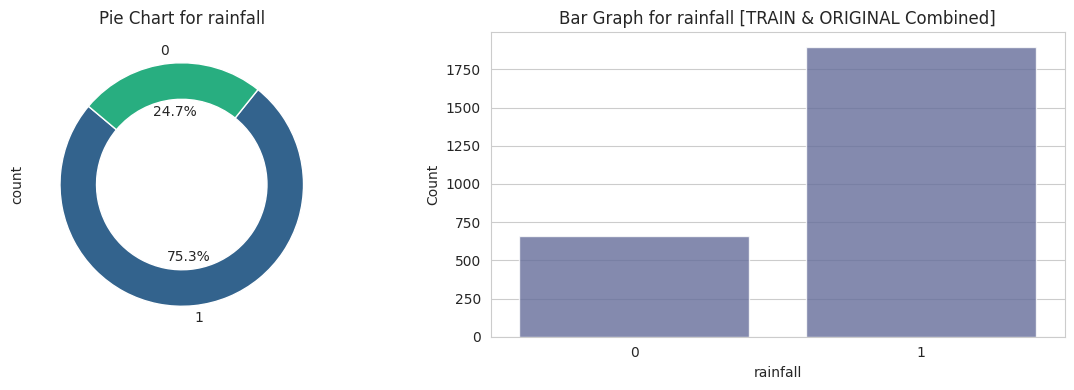

In [178]:
pie_chart_palette = ['#33638d', '#28ae80', '#d3eb0c', '#ff9a0b', '#7e03a8', '#35b779', '#fde725', '#440154', '#90d743', '#482173', '#22a884', '#f8961e']

countplot_color = '#5C67A3'

# Function to create and display a row of plots for a single target variable
def create_target_plots(variable):
    sns.set_style('whitegrid')
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Pie Chart
    plt.subplot(1, 2, 1)
    train_data[variable].value_counts().plot.pie(
        autopct='%1.1f%%', colors=pie_chart_palette, wedgeprops=dict(width=0.3), startangle=140
    )
    plt.title(f"Pie Chart for {variable}")

    # Bar Graph
    plt.subplot(1, 2, 2)
    sns.countplot(
        data=pd.concat([train_data, original_data.dropna()]), 
        x=variable, 
        color=countplot_color,  # Using a single color for the countplot
        alpha=0.8  # Setting 80% opacity
    )
    plt.xlabel(variable)
    plt.ylabel("Count")
    plt.title(f"Bar Graph for {variable} [TRAIN & ORIGINAL Combined]")

    # Adjust spacing between subplots
    plt.tight_layout()
    
    # Show the plots
    plt.show()

# Perform univariate analysis for target variable
create_target_plots(target_variable)

### <span style="color:#ffffff; font-size: 1%;">SW-Key-Target-Insights</span>

<div style="background-color:  #E8F8F5; border-left: 8px solid #1ABC9C; padding: 20px; border-radius: 8px; font-size: 14px; color: #000000;">
      <h3 style="font-size: 20px; margin-bottom: 10px;"> 🤔💁‍♀️So What?! <strong>(📝 Key Insights)</strong></h3>
    <hr>
  <p><strong>1️⃣ Class Imbalance Detected ⚠️</strong></p>
  <ul>
      <li>The dataset is imbalanced, with ~75.3% rainy days (1) and ~24.7% non-rainy days (0).</li>
      <li>This suggests that a simple classifier might predict "rain" more often, leading to biased results.</li>
   </ul>
  <p><strong>2️⃣ Imbalanced Data May Affect Model Performance 📉</strong></p>
  <ul>
      <li>Since the data is skewed toward rainy days, models may struggle to correctly predict non-rainy days.</li>
      <li>We might need resampling techniques (e.g., SMOTE, undersampling) or adjusted class weights to improve balance.</li>
  </ul>
</div>

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [3.4] <strong> Bivariate Analysis </strong></span></b>

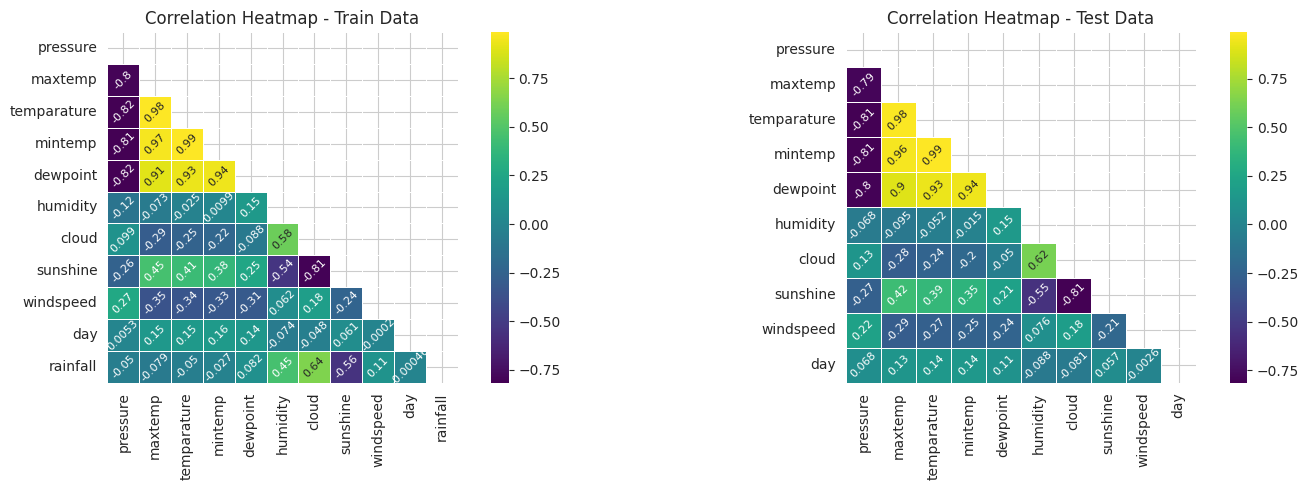

In [179]:
variables = [col for col in train_data.columns if col in numerical_variables]+['day']

# Adding variables to the existing list
test_variables = variables
train_variables = variables+ ['rainfall']

# Calculate correlation matrices for train_data and test_data
corr_train = train_data[train_variables].corr()
corr_test = test_data[test_variables].corr()

# Create masks for the upper triangle
mask_train = np.triu(np.ones_like(corr_train, dtype=bool))
mask_test = np.triu(np.ones_like(corr_test, dtype=bool))

# Set the text size and rotation
annot_kws = {"size": 8, "rotation": 45}

# Generate heatmaps for train_data
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
ax_train = sns.heatmap(corr_train, mask=mask_train, cmap='viridis', annot=True,
                      square=True, linewidths=.5, xticklabels=1, yticklabels=1, annot_kws=annot_kws)
plt.title('Correlation Heatmap - Train Data')

# Generate heatmaps for test_data
plt.subplot(1, 2, 2)
ax_test = sns.heatmap(corr_test, mask=mask_test, cmap='viridis', annot=True,
                     square=True, linewidths=.5, xticklabels=1, yticklabels=1, annot_kws=annot_kws)
plt.title('Correlation Heatmap - Test Data')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

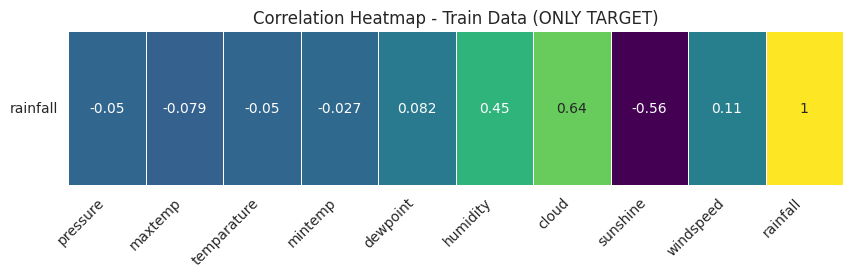

In [180]:
# Selecting numerical features + target variable
variables = [col for col in train_data.columns if col in numerical_variables]
train_variables = variables + ['rainfall']

# Compute correlation with 'rainfall' and transpose for horizontal display
corr_train = train_data[train_variables].corr()[['rainfall']].T  # Transpose for horizontal orientation

# Set the text size and rotation
annot_kws = {"size": 10}  # Increased size for better visibility

# Generate horizontal heatmap without color bar
plt.figure(figsize=(10, 2))  # Adjusted for a horizontal layout
ax_train = sns.heatmap(corr_train, cmap='viridis', annot=True, 
                      square=False, linewidths=0.5, annot_kws=annot_kws, 
                      cbar=False)  # **Removed color bar**

# Formatting
plt.xticks(rotation=45, ha="right")  # Rotate labels for readability
plt.title('Correlation Heatmap - Train Data (ONLY TARGET)')
plt.yticks(rotation=0)  # Keep y-labels horizontal

# Show plot
plt.show()

> **⚠️ NOTE:** Exploratory Data Analysis (**EDA**) is an **iterative process** 🔄 that may need to be revisited **after data preprocessing** to refine insights and confirm assumptions. The patterns and relationships observed at this stage **might change** after handling missing values, transforming variables, or encoding categorical features. **EDA is not limited to this section**—it is an ongoing step throughout the data pipeline to ensure robust conclusions. ⚠️

<div style="background-color: #FEF9E7; border-left: 8px solid #D4AC0D; padding: 20px; border-radius: 8px; font-size: 14px; color: #000000;">
  <h5 style="font-size: 16px; margin-bottom: 10px; background-color: #F7DC6F; padding: 8px; border-radius: 4px; color: #000000;">
    <strong>💡 New Terms Alert:</strong> <em>Expand Your Data Science Vocabulary!</em>
  </h5>
  <ul>
    <li><strong>📊 Univariate Analysis</strong> → <em>Examining a single variable to understand its distribution, patterns, and characteristics.</em> 🔍</li>
    <li><strong>🔗 Bivariate Analysis</strong> → <em>Exploring the relationship between two variables to identify correlations and dependencies.</em> 🔄</li>
    <li><strong>🔢 Numerical Features</strong> → <em>Features that contain continuous or discrete numerical values, such as age, temperature, or income.</em> 📈</li>
    <li><strong>🔤 Categorical Features</strong> → <em>Features that represent distinct categories or labels, such as gender, color, or product type.</em> 🏷️</li>
    <li><strong>🎯 Target Feature</strong> → <em>The variable we aim to predict in a machine learning model, such as whether it will rain tomorrow (yes/no).</em> 🎯</li>
  </ul>
</div>

### <span style="color:#ffffff; font-size: 1%;">SW-Key-Correlation-Insights</span>

<div style="background-color:  #E8F8F5; border-left: 8px solid #1ABC9C; padding: 20px; border-radius: 8px; font-size: 14px; color: #000000;">
  <h3 style="font-size: 20px; margin-bottom: 10px;"> 🤔💁‍♀️So What?! <strong>(📝 Key Insights)</strong></h3>
  <hr>

  <p><strong>1️⃣ Highly Correlated Temperature Features 🌡️</strong></p>
  <ul>
      <li><code>maxtemp</code>, <code>temperature</code>, and <code>mintemp</code> show <strong>extremely high correlations (r > 0.96)</strong>, indicating redundancy. <code>dewpoint</code> is also strongly correlated with temperature features (r > 0.90).</li>
  </ul>
  <p>✅ <strong>Next Steps:</strong> Consider <strong>feature selection or dimensionality reduction (PCA)</strong> to reduce redundancy.</p>
  <hr>

  <p><strong>2️⃣ Key Rainfall Predictors: Cloud Cover, Sunshine & Humidity ☁️☀️💧☔</strong></p>
  <ul>
      <li><code>cloud</code> has the strongest positive correlation with rainfall (<strong>0.64</strong>), making it highly predictive.</li>
      <li><code>sunshine</code> strongly negatively correlates with rainfall (<strong>-0.56</strong>), indicating more rain when sunshine duration decreases.</li>
      <li><code>humidity</code> shows significant positive correlation (<strong>0.45+</strong>) with rainfall, highlighting its predictive importance.</li>
  </ul>
  <p>✅ <strong>Next Steps:</strong> Prioritize <strong>cloud cover, sunshine duration, and humidity</strong> in feature engineering.</p>
  <hr>

  <p><strong>3️⃣ Limited Impact of Pressure and Wind Speed on Rainfall 🌡️🌬️☔</strong></p>
  <ul>
      <li><code>pressure</code> and <code>windspeed</code> have minimal correlations (<strong>|r| ~0.05–0.11</strong>) with rainfall, suggesting limited direct predictive power.</li>
  </ul>
  <hr>

  <p><strong>4️⃣ Near-Zero Correlation of <code>day</code> with Rainfall 🗓️</strong></p>
  <ul>
      <li><code>day</code> shows almost no correlation (<strong>-0.0005</strong>) with rainfall, indicating <strong>no clear seasonal pattern</strong> across the year in this dataset.</li>
      <li>However, combining <code>day</code> with other variables (e.g., <code>humidity</code>, <code>cloud</code>, or <code>sunshine</code>) or analyzing by <strong>months/seasons</strong> could still uncover hidden trends.</li>
  </ul>
  <p>✅ <strong>Next Steps:</strong> Investigate <strong>seasonal grouping or interactions</strong> to determine if time-based features improve predictive performance.</p>

</div>


<div style="background-color: #FEF9E7; border-left: 8px solid #D4AC0D; padding: 20px; border-radius: 8px; font-size: 14px; color: #000000;">
  <h5 style="font-size: 16px; margin-bottom: 10px; background-color: #F7DC6F; padding: 8px; border-radius: 4px; color: #000000;">
    <strong>💡 Quick Code Bite:</strong> <em>Learn One Line at a Time!</em>
  </h5>
  <ul>
    <li><strong>pd.concat([df1, df2])</strong> → <em>Stacks DataFrames together—vertically or side by side!</em> 🔗</li>
    <li><strong>sns.boxplot(x='column', data=df)</strong> → <em>Visualizes data spread and outliers—spot the extremes!</em> 📦</li>
    <li><strong>sns.histplot(df['column'])</strong> → <em>Plots the distribution of a feature—see the shape of your data!</em> 📊</li>
    <li><strong>df.corr()</strong> → <em>Checks relationships between numerical columns—find hidden patterns!</em> 🔍</li>
  </ul>
</div>

### <span style="color:#ffffff; font-size: 1%;">Time-Series-EDA</span>

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [3.4] <strong>Time Series EDA:</strong>  Detecting Trends, Seasonality & Anomalies ⏰ </span></b>


The dataset exhibits a **time series nature** ⏳ due to the structured **repetition** 🔁 of values in the `day` column of the **train dataset**, suggesting a **consistent chronological order** 📅.  

- The **training dataset** spans **six consecutive years** 📆, each containing **365 days**.  
- The **test dataset** represents a **two-year period** 🗓️ with **365 days each**.  
- The **original dataset**, in contrast, includes a **leap year (366 days)** 🚀, making its `day` column slightly different—it represents the **day component of the actual date** 📌 rather than a simple sequence.

![image](https://github.com/user-attachments/assets/792a3e8d-b1ff-4450-a943-b6c200db0f17)

To verify this **temporal structure** 🔍, we will **plot ID vs. time** ⏰ to ensure the pattern aligns with our expectations.

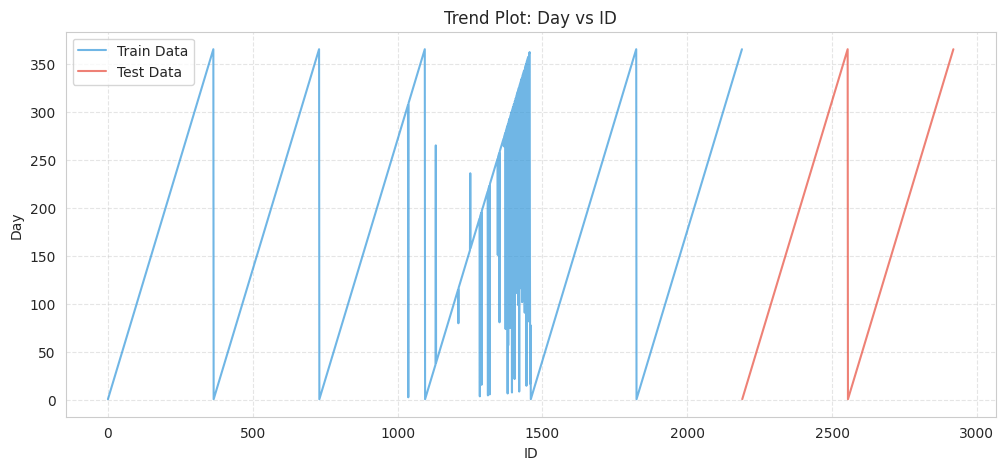

In [181]:
# Define colors for Train and Test data
train_color = '#3498db'  # Blue
test_color = '#e74c3c'   # Red

# Create the plot
plt.figure(figsize=(12, 5))

# Plot Train Data
plt.plot(train_data['id'], train_data['day'], linestyle='-', color=train_color, label='Train Data', alpha=0.7)

# Plot Test Data
plt.plot(test_data['id'], test_data['day'], linestyle='-', color=test_color, label='Test Data', alpha=0.7)

# Formatting
plt.xlabel('ID')
plt.ylabel('Day')
plt.title('Trend Plot: Day vs ID')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.show()

In [182]:
# Generate the expected repeating pattern (1-365 for 6 years)
expected_pattern = np.tile(np.arange(1, 366), 6)  # Repeats 1-365 exactly 6 times

# Check for incorrect labels
train_data['expected_day'] = expected_pattern[:len(train_data)]  # Assign expected pattern
train_data['day_mismatch'] = train_data['day'] != train_data['expected_day']  # Flag mismatches

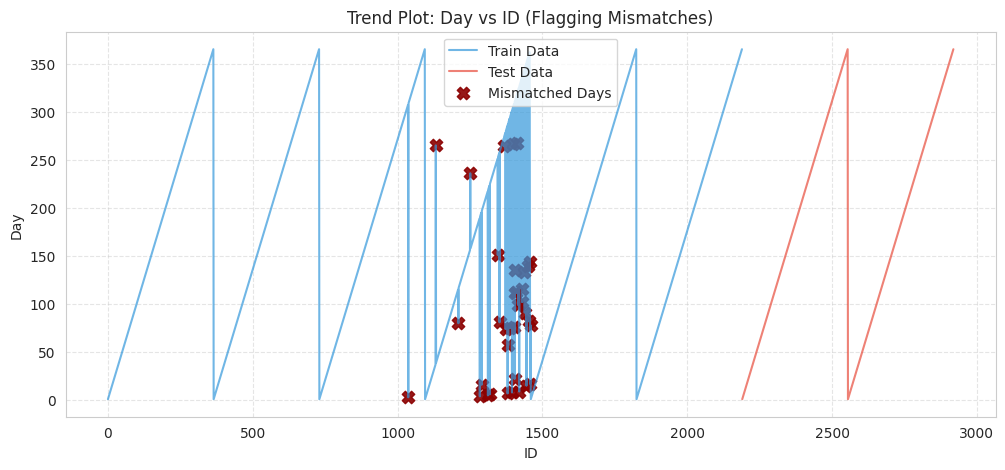

In [183]:
flag_color = '#8B0000'   # Dark Red (for mismatched days)

# Generate expected repeating pattern (1-365 for 6 years)
expected_pattern = np.tile(np.arange(1, 366), 6)  # Repeats 1-365 exactly 6 times

# Assign expected pattern and flag mismatches
train_data['expected_day'] = expected_pattern[:len(train_data)]
train_data['day_mismatch'] = train_data['day'] != train_data['expected_day']  # Boolean flag

# Create the plot
plt.figure(figsize=(12, 5))

# Plot Train Data
plt.plot(train_data['id'], train_data['day'], linestyle='-', color=train_color, label='Train Data', alpha=0.7)

# Plot Test Data
plt.plot(test_data['id'], test_data['day'], linestyle='-', color=test_color, label='Test Data', alpha=0.7)

# Flag mismatched days using red markers
plt.scatter(
    train_data.loc[train_data['day_mismatch'], 'id'],  # X-axis: IDs of mismatched days
    train_data.loc[train_data['day_mismatch'], 'day'], # Y-axis: Corresponding incorrect days
    color=flag_color, marker='X', s=80, label='Mismatched Days', alpha=0.9
)

# Formatting
plt.xlabel('ID')
plt.ylabel('Day')
plt.title('Trend Plot: Day vs ID (Flagging Mismatches)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.show()

> **⚠️ NOTE:** From the **ID vs. day** plot, we observe some **inconsistencies in the 'days' column** within the **training dataset**. Specifically, a few rows in the middle years exhibit **errors in sequential day numbers**, disrupting the expected pattern. This issue arises due to the **data generator model used for the Playground episode**. To maintain consistency in time-based analysis, we will **correct these errors by generating a proper sequential day series using `np.arange`**. ⚠️
>
> ![image](https://github.com/user-attachments/assets/792a3e8d-b1ff-4450-a943-b6c200db0f17)



In [184]:
train_data['day'] = train_data['expected_day']

# Get the last day value from train data
last_train_day = train_data['day'].iloc[-1]

# Generate sequential day numbers for the test dataset
test_data['day'] = np.arange(last_train_day + 1, last_train_day + 1 + len(test_data))

train_data.drop(columns=['expected_day', 'day_mismatch'], errors='ignore', inplace=True)  # Drop 'expected_day' if it exists

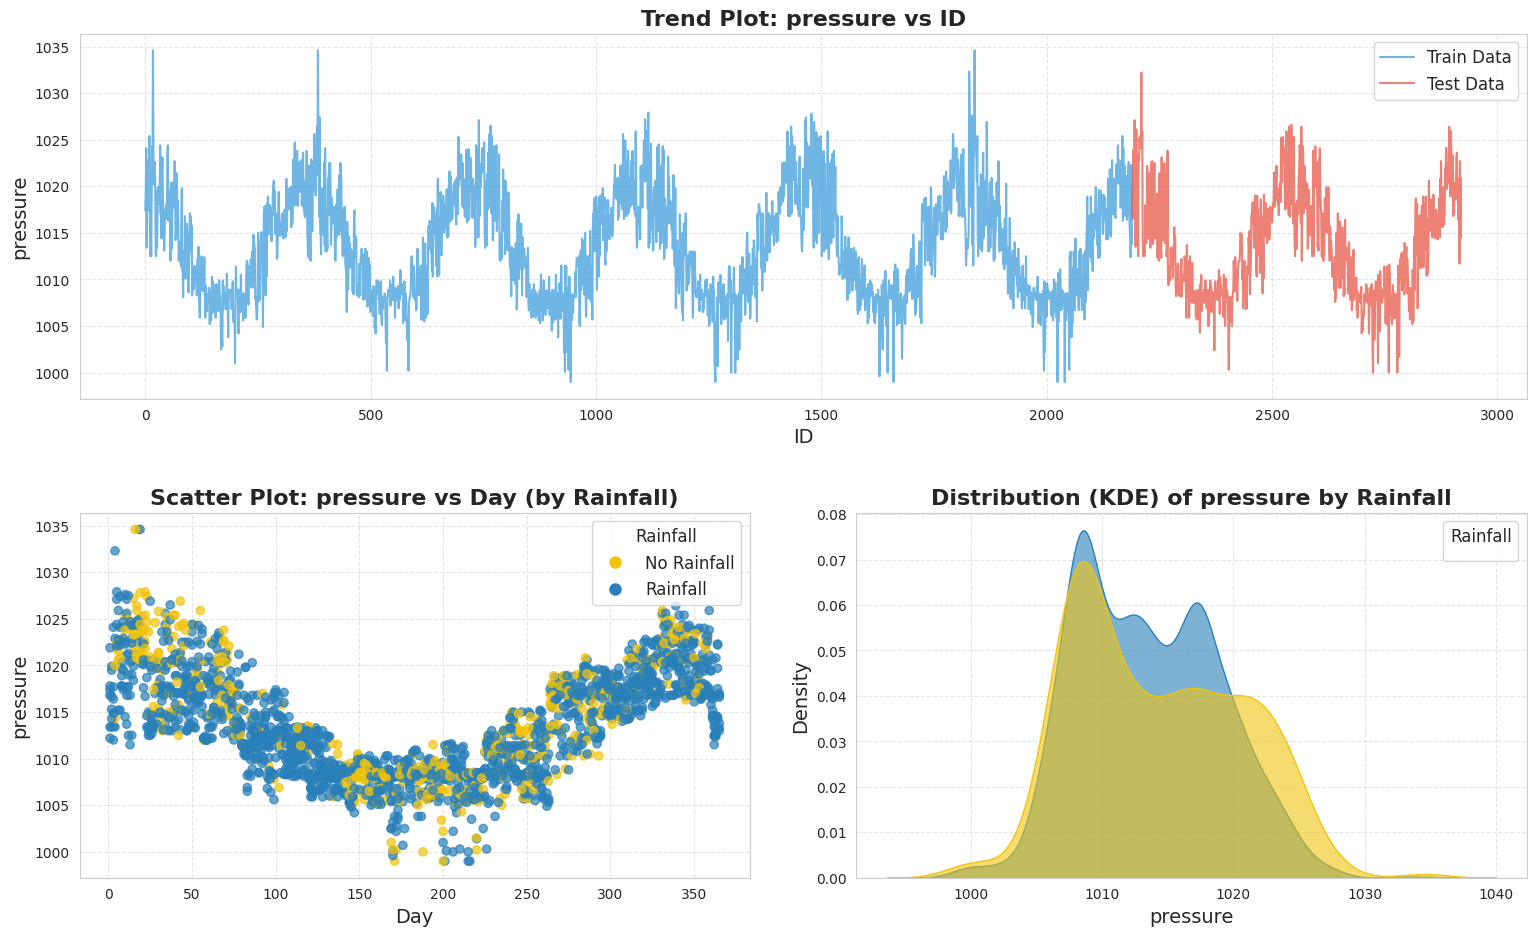

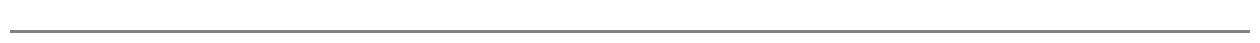

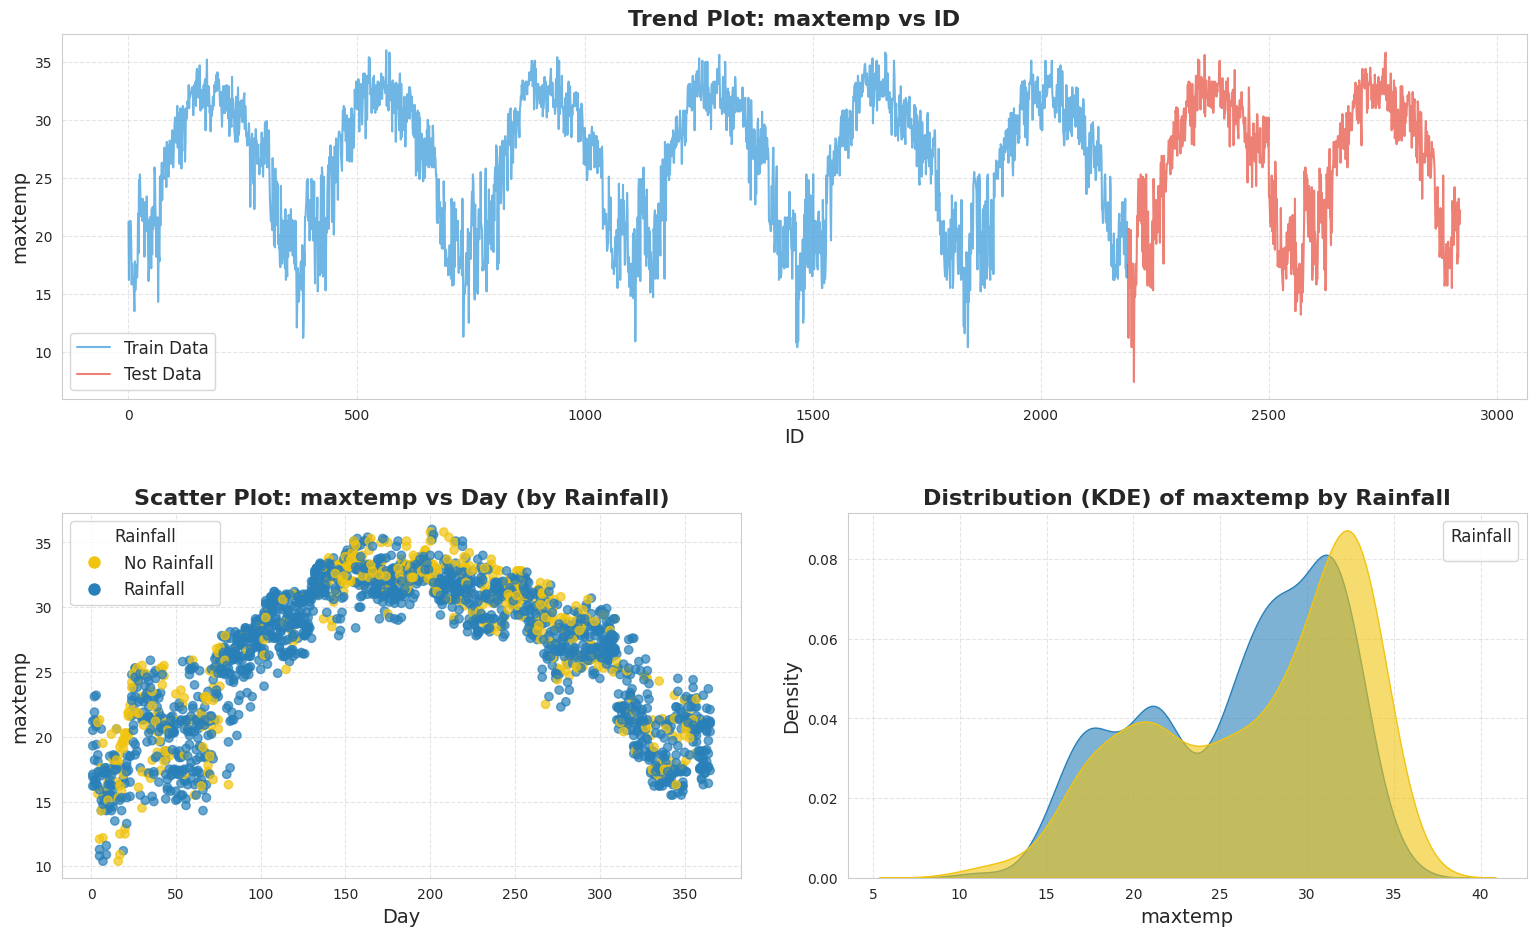

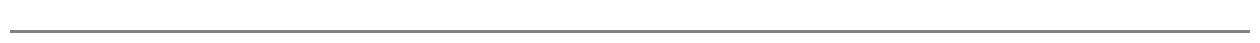

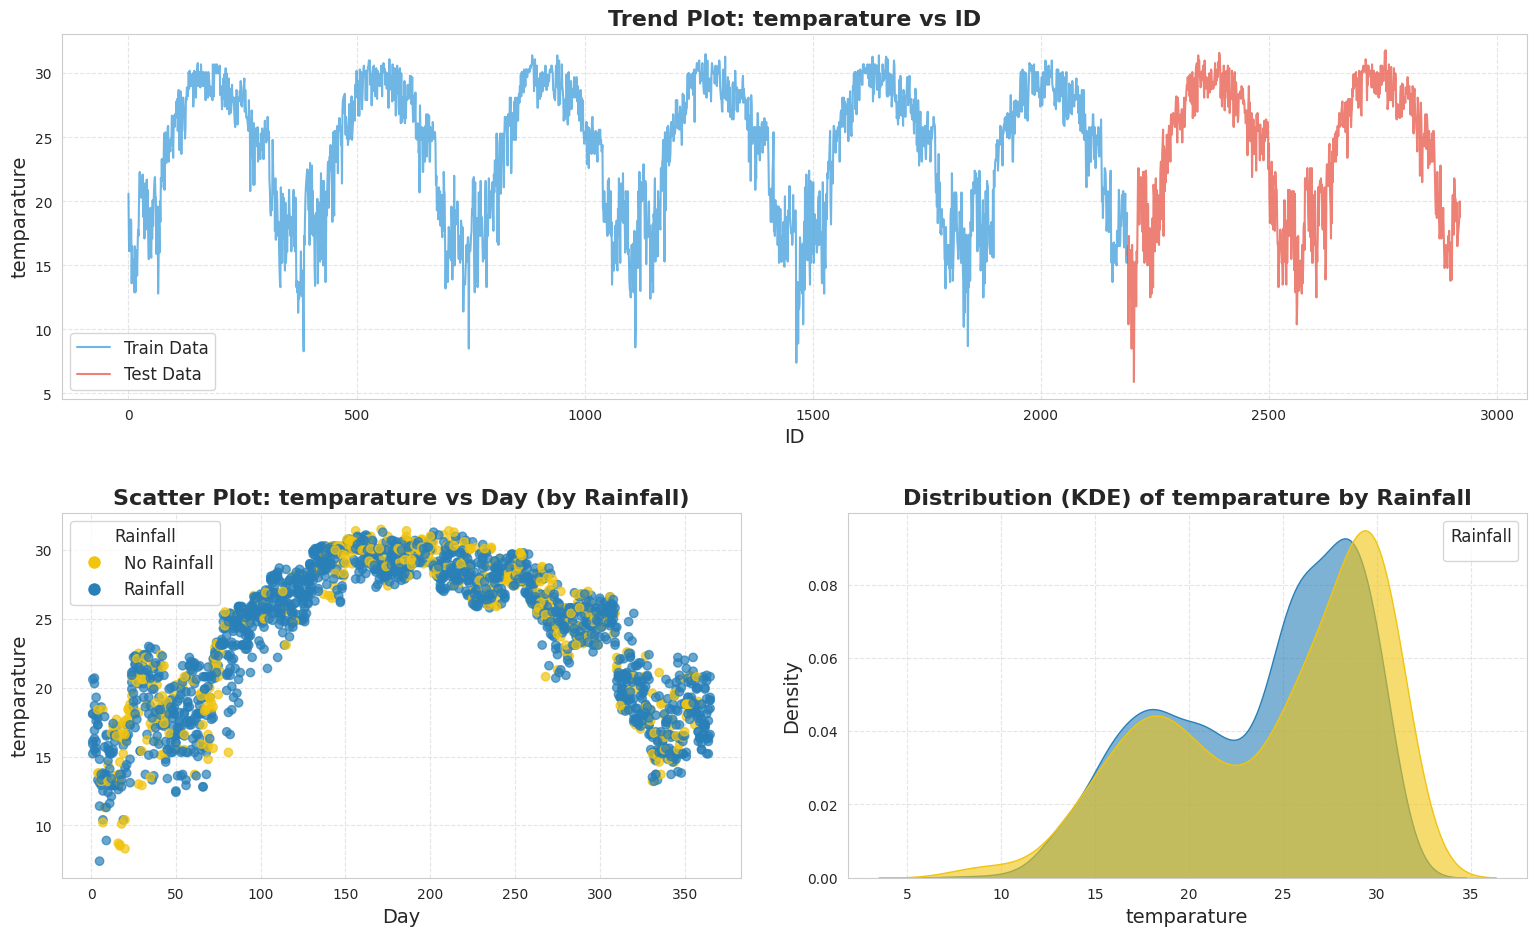

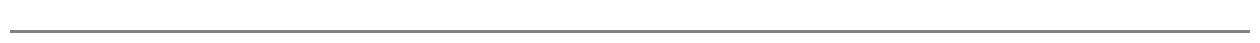

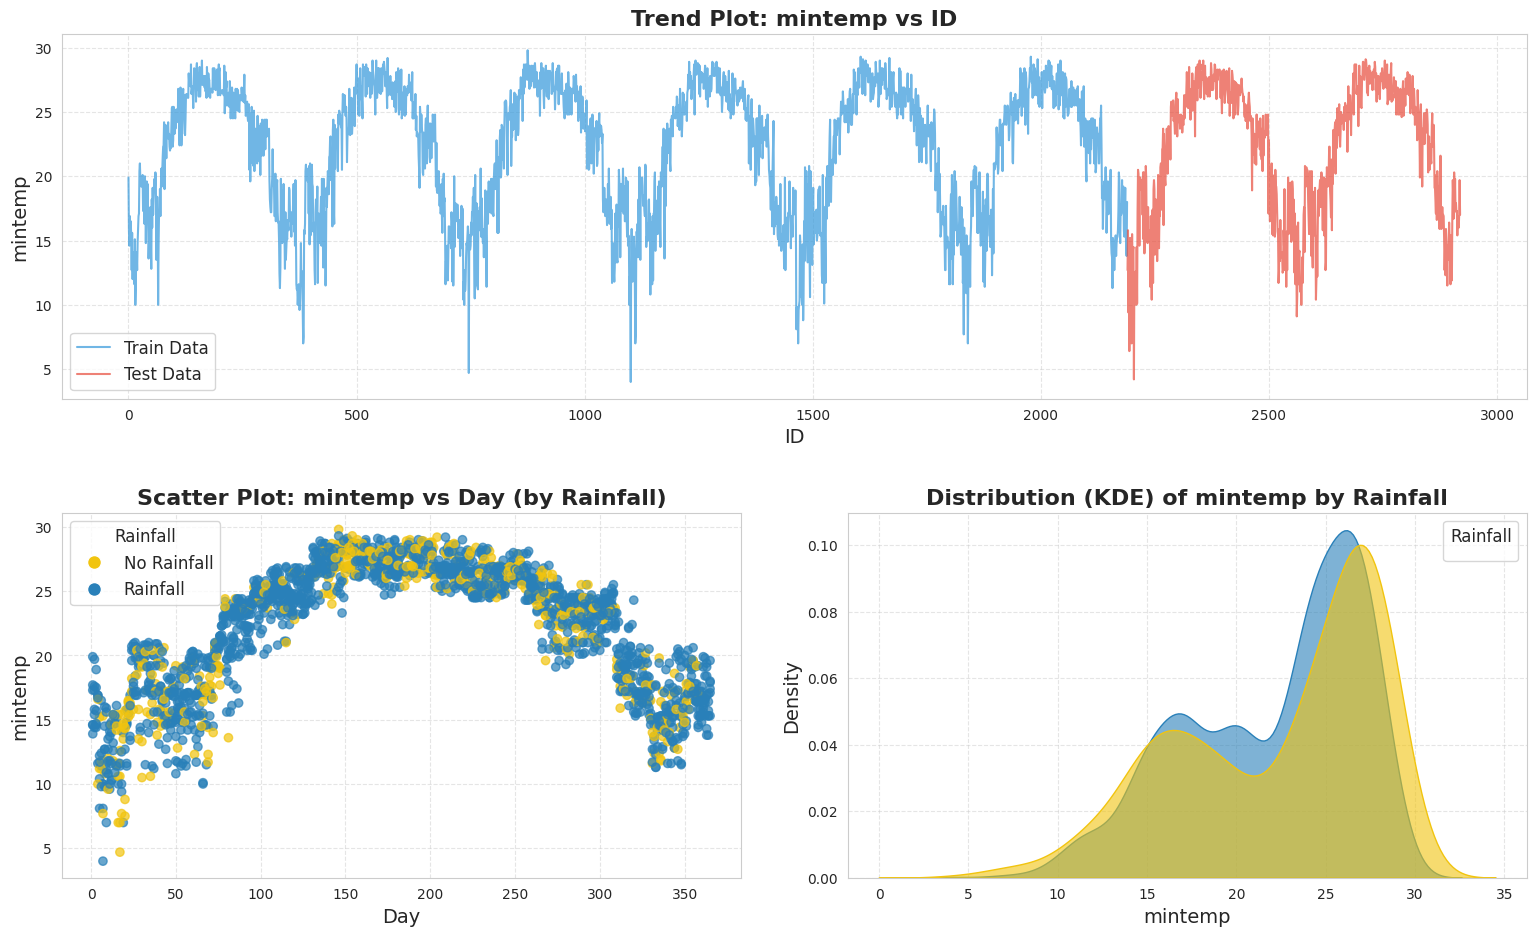

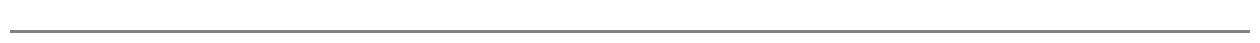

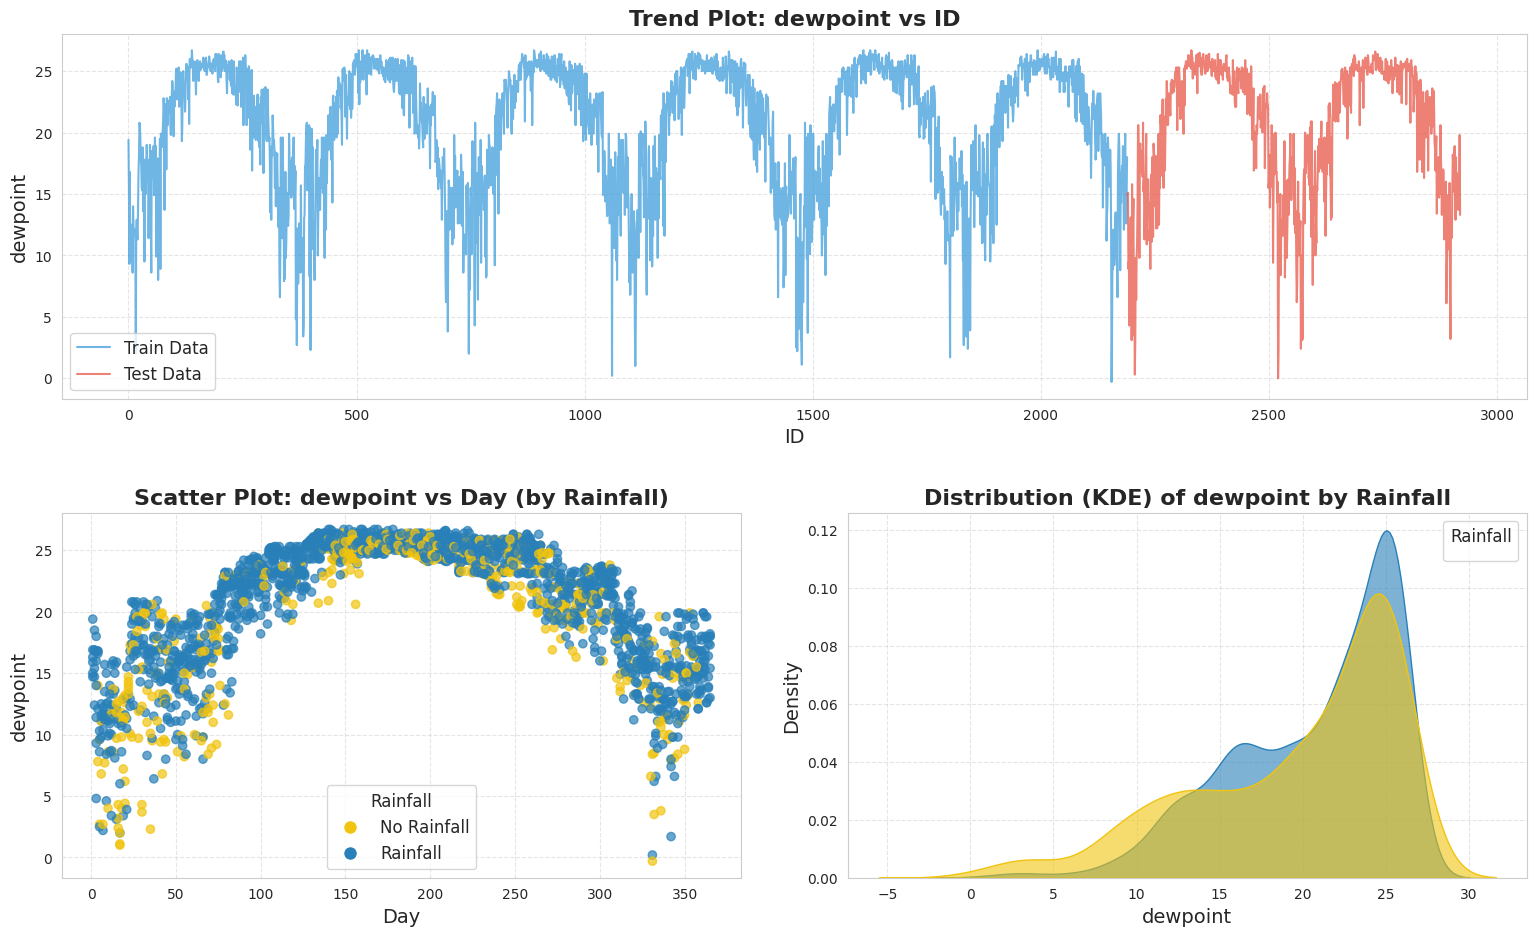

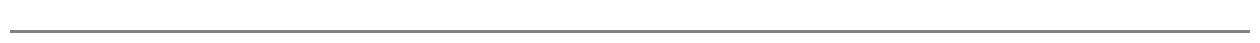

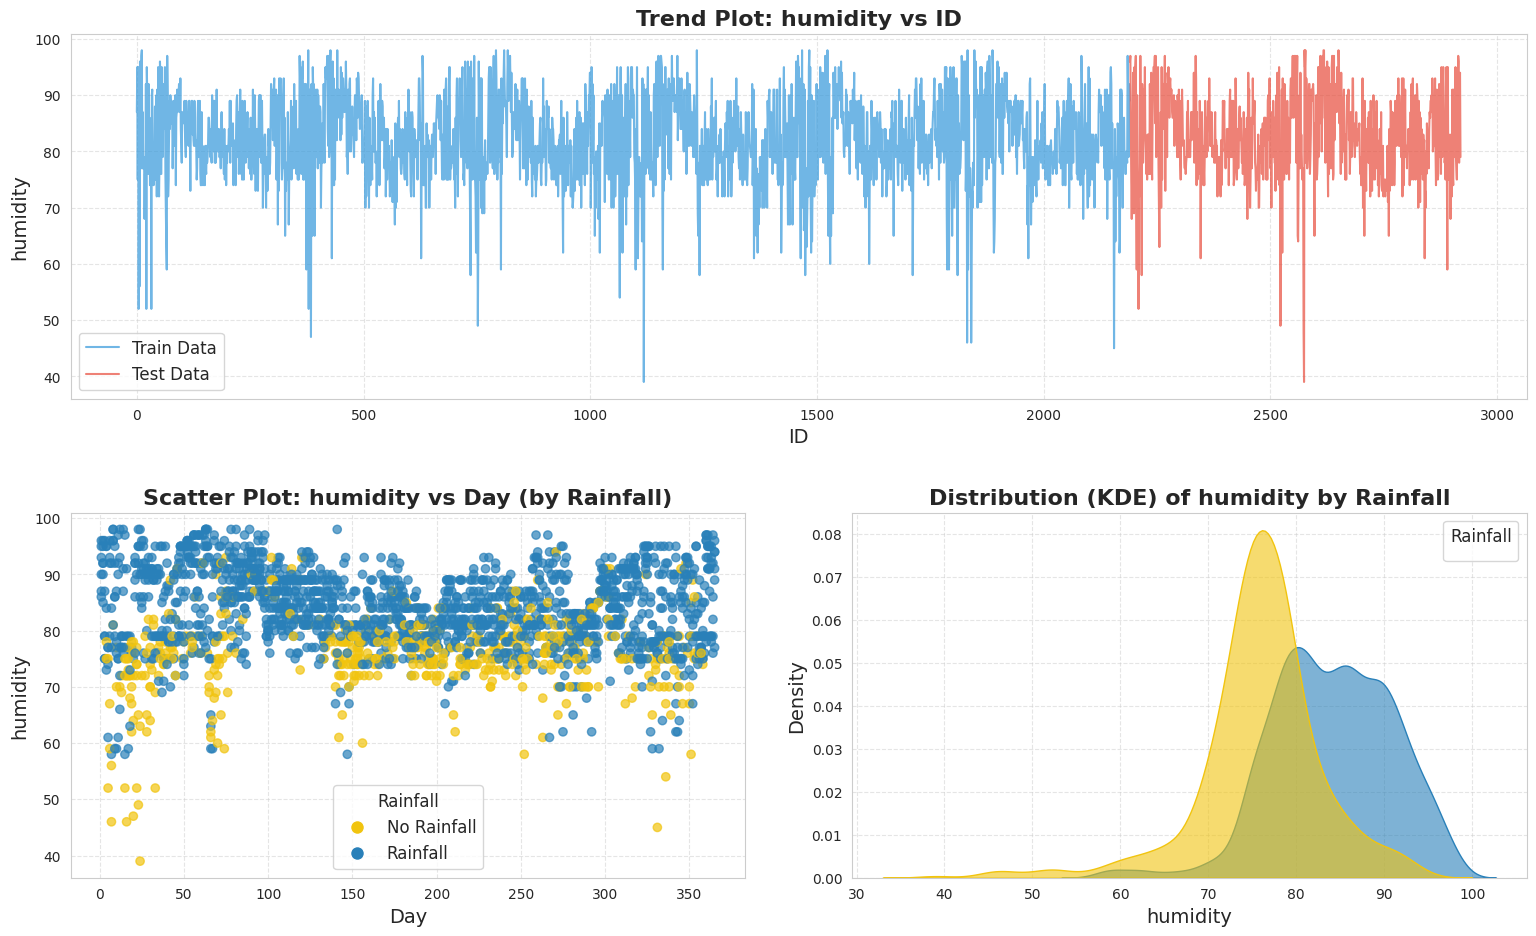

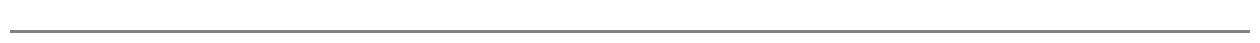

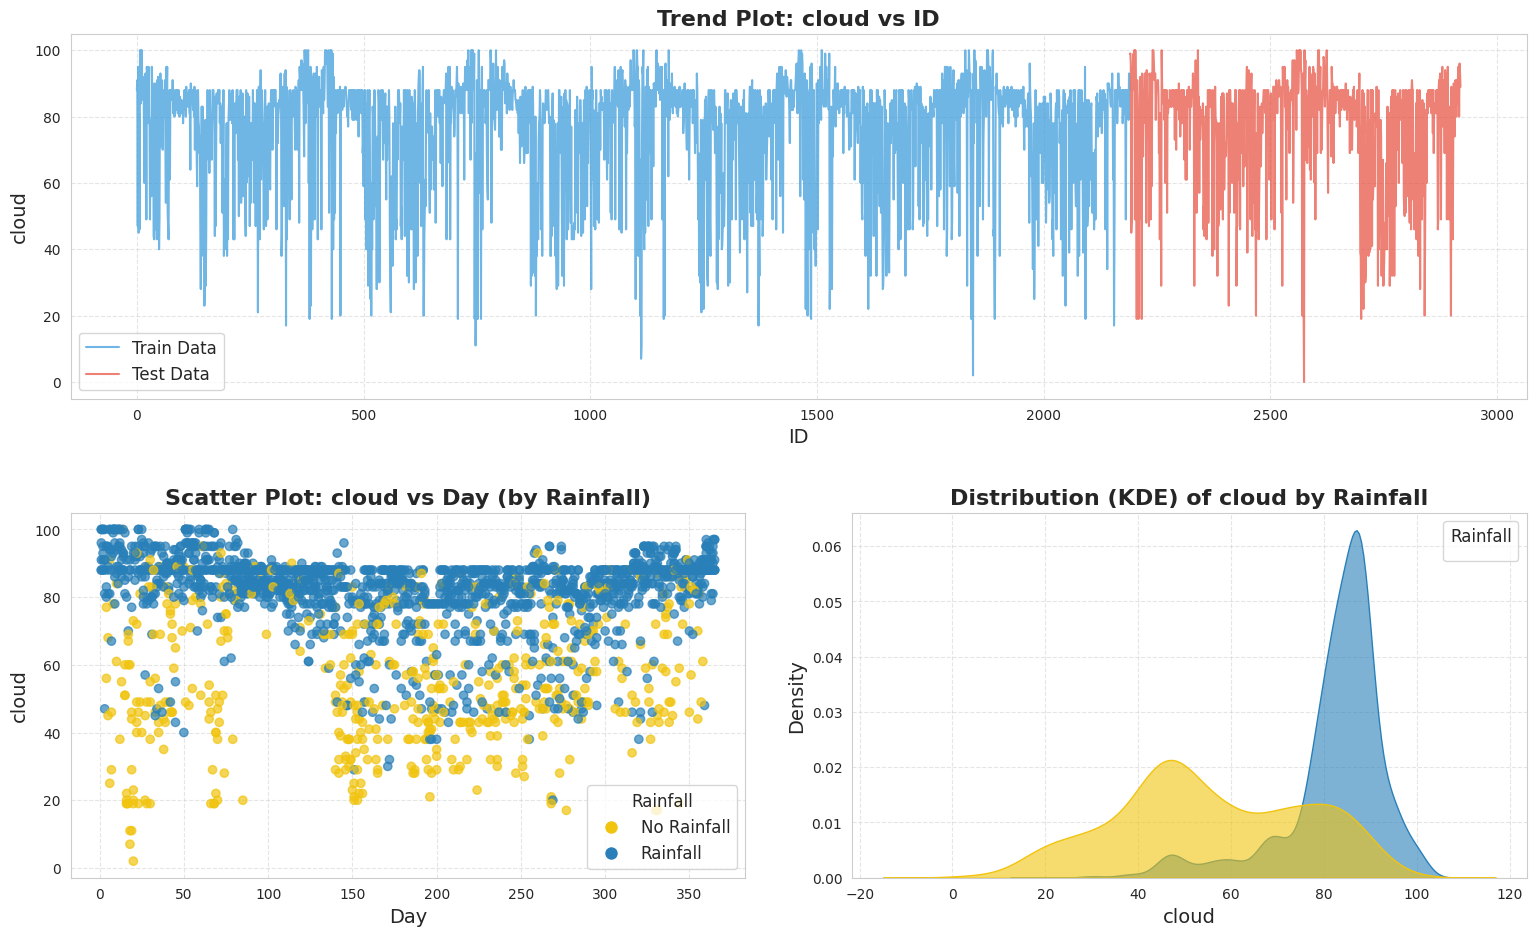

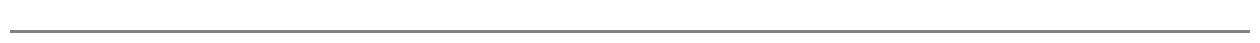

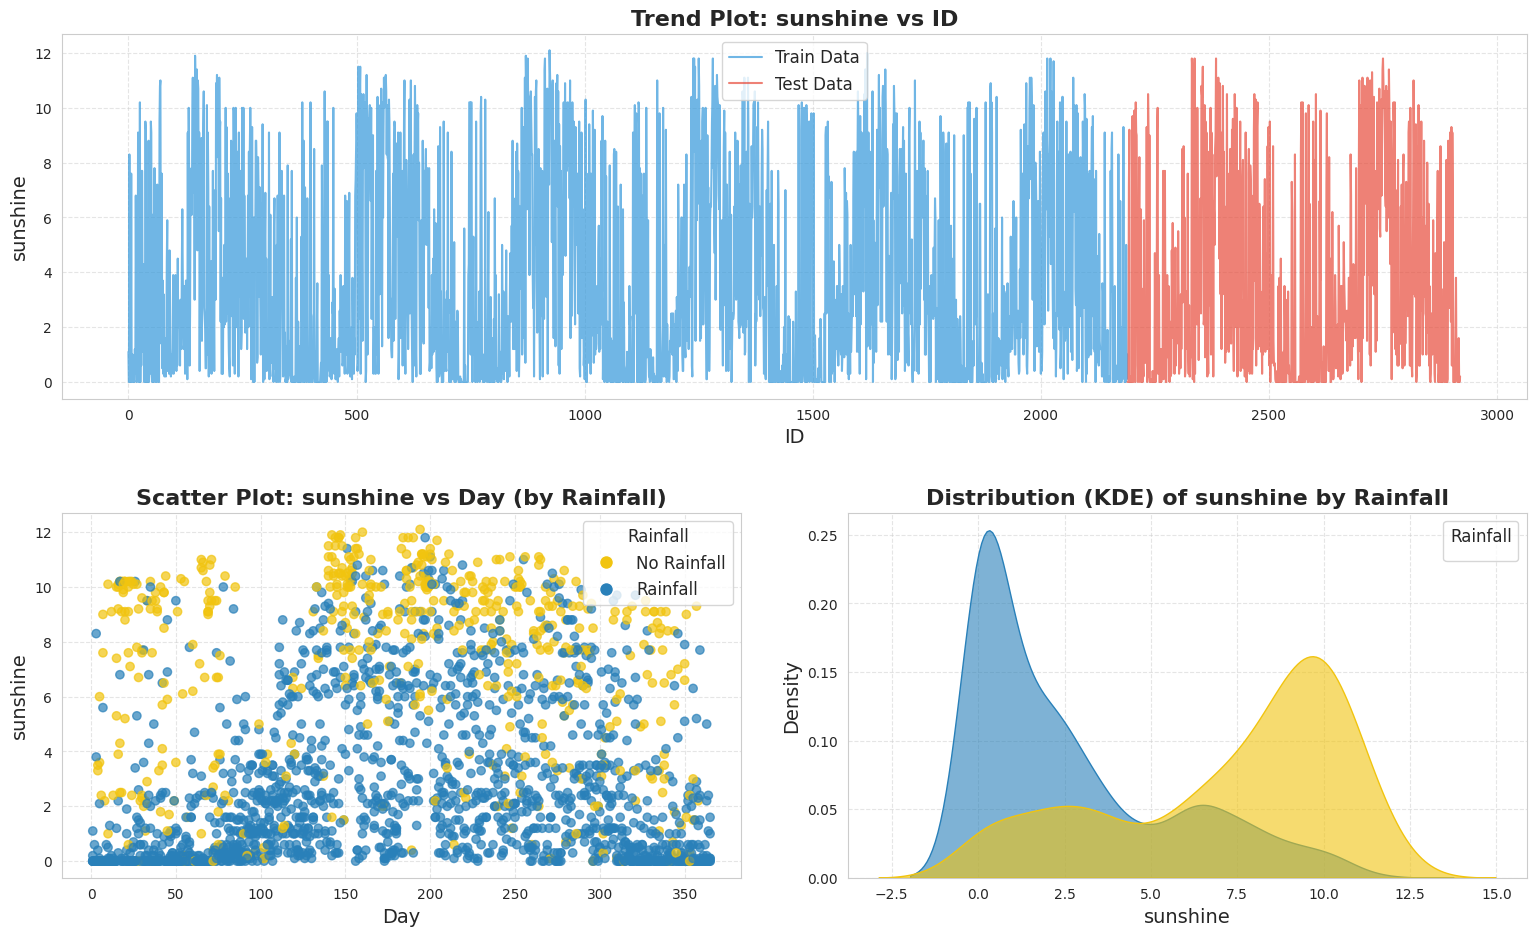

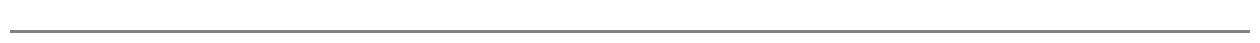

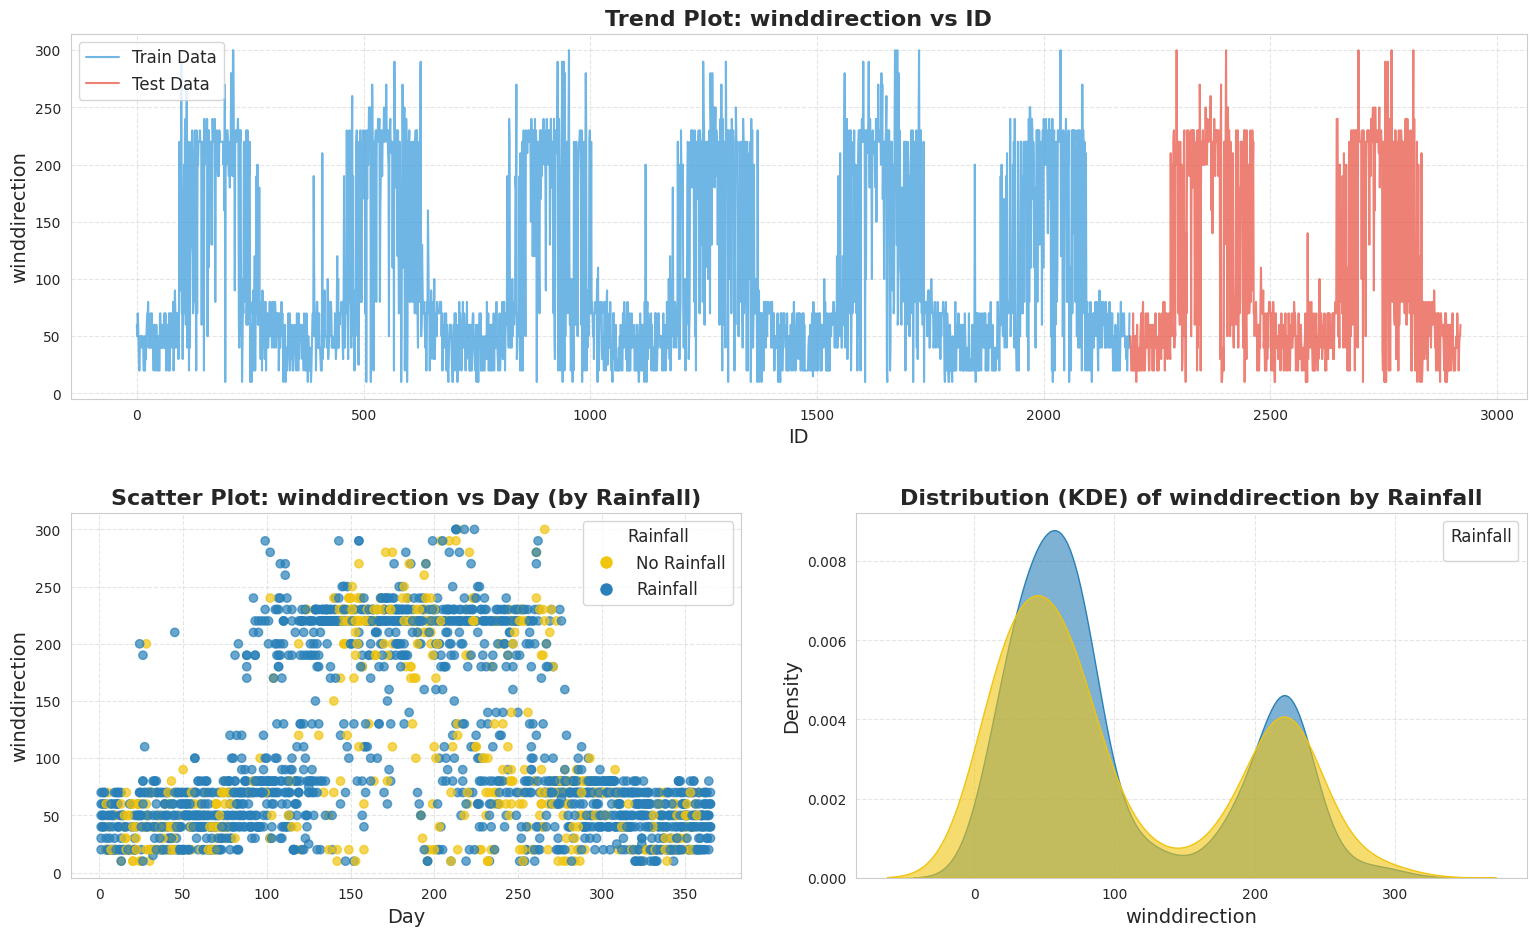

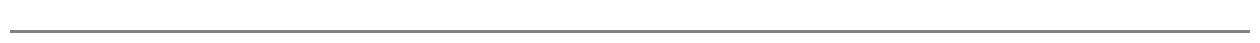

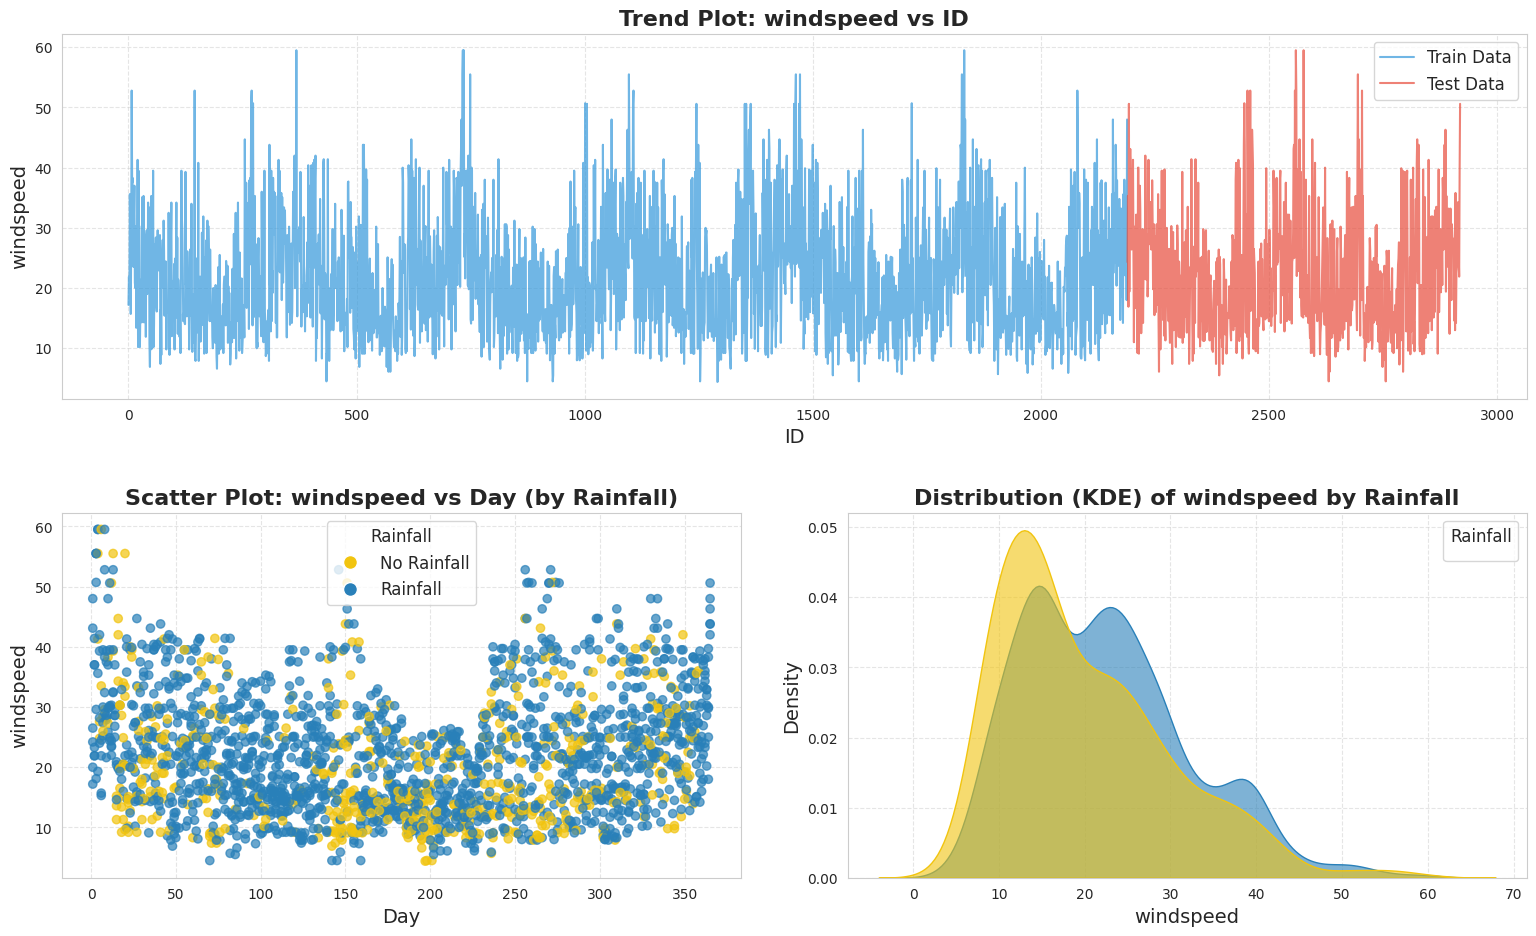

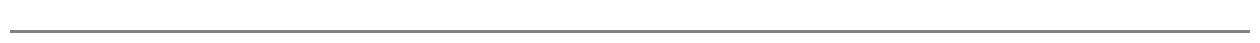

In [185]:
# Define colors
train_color = '#3498db'  # Blue
test_color = '#e74c3c'   # Red
rainfall_colors = {0: '#f1c40f', 1: '#2980b9'}  # Dark Yellow (no rainfall), Blue (rainfall)

# Numerical columns to plot
numerical_columns = test_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in ['id', 'day', 'rainfall']:
    if col in numerical_columns:
        numerical_columns.remove(col)

# Plotting loop for each numerical variable
for column in numerical_columns:
    # Create figure with specific layout
    fig = plt.figure(figsize=(16, 10))
    gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])

    # ---- Trend Plot (ID vs Variable) ----
    ax0 = fig.add_subplot(gs[0, :])
    ax0.plot(train_data['id'], train_data[column], linestyle='-', color=train_color, label='Train Data', alpha=0.7)
    ax0.plot(test_data['id'], test_data[column], linestyle='-', color=test_color, label='Test Data', alpha=0.7)

    ax0.set_xlabel('ID', fontsize=14)
    ax0.set_ylabel(column, fontsize=14)
    ax0.set_title(f'Trend Plot: {column} vs ID', fontsize=16, fontweight='bold')  # ✅ Fix applied
    ax0.legend(fontsize=12)
    ax0.grid(True, linestyle='--', alpha=0.5)

    # ---- Scatter Plot (Day vs Variable) ----
    ax1 = fig.add_subplot(gs[1, 0])
    scatter = ax1.scatter(
        train_data['day'], train_data[column],
        c=train_data['rainfall'].map(rainfall_colors), alpha=0.7
    )
    ax1.set_xlabel('Day', fontsize=14)
    ax1.set_ylabel(column, fontsize=14)
    ax1.set_title(f'Scatter Plot: {column} vs Day (by Rainfall)', fontsize=16, fontweight='bold')  # ✅ Fix applied

    # Custom legend for rainfall
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='No Rainfall',
               markersize=10, markerfacecolor=rainfall_colors[0]),
        Line2D([0], [0], marker='o', color='w', label='Rainfall',
               markersize=10, markerfacecolor=rainfall_colors[1])
    ]
    ax1.legend(handles=legend_elements, title="Rainfall", fontsize=12, title_fontsize=12)
    ax1.grid(True, linestyle='--', alpha=0.5)

    # ---- KDE Plot (Variable distribution by Rainfall) ----
    ax2 = fig.add_subplot(gs[1, 1])
    sns.kdeplot(data=train_data, x=column, hue='rainfall', palette=rainfall_colors, ax=ax2, fill=True, common_norm=False, alpha=0.6)

    ax2.set_xlabel(column, fontsize=14)
    ax2.set_ylabel('Density', fontsize=14)
    ax2.set_title(f'Distribution (KDE) of {column} by Rainfall', fontsize=16, fontweight='bold')  
    ax2.legend(title='Rainfall', fontsize=12, title_fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.5)

    # Adjust layout spacing
    plt.tight_layout(pad=3.0)
    plt.show()

    # ---- Add clear separation after each variable ----
    plt.figure(figsize=(16, 0.3))  # Adjust spacing
    plt.axhline(y=0, color='gray', linewidth=5, linestyle='-') 
    plt.axis('off')
    plt.show()

<div style="background-color: #E8F8F5; border-left: 8px solid #1ABC9C; padding: 20px; border-radius: 8px; font-size: 14px; color: #000000;">
    <h3 style="font-size: 20px; margin-bottom: 10px;">🤔💁‍♀️ So What?! <strong>(📈 Trend, Scatter & KDE Observations</strong>)</h3>
    <hr>
    <p><strong>1️⃣ Confirming Time Series Nature 📅⏳</strong></p>
    <ul>
        <li>All columns in the training data are <strong>numeric</strong>, and most exhibit clear <strong>sinusoidal patterns</strong>, indicating strong <strong>yearly periodicity</strong>.</li>
        <li>This periodicity aligns with the dataset's original nature, confirming its <strong>time-series characteristics</strong>.</li>
    </ul>
    <hr>
    <p><strong>2️⃣ Importance of Scatter and KDE plots 🧐📊</strong></p>
    <ul>
        <li>Scatter and KDE plots illustrate how each feature's distribution varies over time, distinguishing clearly between <strong>rainy and non-rainy days</strong>.</li>
        <li>Features that clearly separate distributions for rain vs. no rain indicate <strong>strong predictive power</strong> for rainfall.</li>
    </ul>
    <img src="https://github.com/user-attachments/assets/1fd33099-e91c-410b-8bc6-ca4b78e1e15c" alt="Image">
    <strong>* (These are examples)</strong> <p><em>📌Features that show clear separation between rainfall and no rainfall tend to be better predictors, while those with overlapping distributions may have limited predictive power.</em></p>
    <hr>
    <p><strong>3️⃣ Key Observations by Feature 🔍🌦️</strong></p>
    <ul>
        <li><strong>🌡️ Temperature Features (<code>maxtemp</code>, <code>temparature</code>, <code>mintemp</code>):</strong>
            <ul>
                <li>Significant overlap in rain/no-rain distributions, indicating <strong>limited predictive power</strong>, matching low correlations observed earlier.</li>
                <li>However, slightly warmer temperatures tend to increase rainfall probability.</li>
            </ul>
        </li>
        <li><strong>💧 Dew Point (<code>dewpoint</code>):</strong>
            <ul>
                <li>Distributions for rain/no-rain mostly overlap, with higher values slightly skewed towards rainy days.</li>
                <li>Higher dewpoint values indicate <strong>increased moisture</strong>, suggesting a higher likelihood of rainfall.</li>
            </ul>
        </li>
        <li><strong>💦 Humidity (<code>humidity</code>) & ☁️ Cloud Cover (<code>cloud</code>):</strong>
            <ul>
                <li>Both features show clear separation between rain and no rain, with higher values strongly associated with rainfall.</li>
                <li>This confirms their significant predictive power: High humidity and cloudiness indicate higher rainfall likelihood.</li>
            </ul>
        </li>
        <li><strong>☀️ Sunshine Duration (<code>sunshine</code>):</strong>
            <ul>
                <li>Clearly distinct distributions; lower sunshine strongly correlates with rainy conditions.</li>
                <li>This highlights reduced sunshine as a clear predictor of rainfall.</li>
            </ul>
        </li>
        <li><strong>🌬️ Wind & Pressure Features (<code>winddirection</code>, <code>windspeed</code>, <code>pressure</code>):</strong>
            <ul>
                <li>No clear distinction in distributions between rain and no-rain days, indicating <strong>low predictive value</strong>.</li>
            </ul>
        </li>
    </ul>

</div>


# <span style="color:#ffffff; font-size: 1%;">[4] 🛠️ Data Preprocessing</span>
### <span style="color:#ffffff; font-size: 1%;">Data Preprocessing</span>

<div style=" border-bottom: 8px solid #FFD700; overflow: hidden; border-radius: 10px; height: 45px; width: 100%; display: flex;">
  <div style="height: 100%; width: 65%; background-color: #7851A9; float: left; text-align: center; display: flex; justify-content: center; align-items: center; font-size: 25px; ">
    <b><span style="color: #FFFFFF; padding: 20px 20px;">[4] 🛠️🧹 Data Preprocessing</span></b>
  </div>
  <div style="height: 100%; width: 35%; background-image: url('https://images.theconversation.com/files/436774/original/file-20211209-172173-1watr8u.jpg?ixlib=rb-4.1.0&rect=7%2C29%2C4881%2C3224&q=20&auto=format&w=320&fit=clip&dpr=2&usm=12&cs=strip'); background-size: cover; background-position: center; float: left; border-top-right-radius: 10px; border-bottom-right-radius: 4px;">
  </div>
</div>

 🔽 [Jump to Modelling & Evaluation 🏗️](#Modelling)  
🔽 [Jump to AI News 🤖](#🤖-AI-News)  

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [4.1] Data Imputation (Handling missing values) </span></b>

We've spotted a **single missing value** in the **winddirection** feature in the **test dataset**! 🧐 While one value might seem insignificant, leaving it empty can cause issues in model training.  

#### 🔧 **How Will We Fix It?**  
We'll use the **median imputation method** to fill in the missing value. Why median? Because **wind direction is a circular variable** (0° to 360°), and the median is more **robust to skewed distributions or extreme values**.  

In [186]:
# Impute the missing value with the median
test_data['winddirection'].fillna(test_data['winddirection'].median(), inplace=True)

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [4.2] Feature Engineering </span></b>

Think of **feature extraction** like brewing the perfect cup of coffee. ☕ You start with raw beans (data), but instead of using them as they are, you **grind, filter, and extract** the rich flavors (key information) to create something **far more useful**.  

In **Machine Learning**, raw data often contains **noise, redundancy, or irrelevant details**. Feature extraction helps by **deriving new, more meaningful features** that enhance model performance.  

---

#### 📌 **Why Feature Extraction Matters?**  
✅ **Enhances patterns & relationships** → Helps models capture hidden trends.  
✅ **Removes noise & redundancy** → Keeps only what truly matters.  
✅ **Improves accuracy & efficiency** → Optimized data leads to better predictions.  
✅ **Reduces dimensionality** → Fewer features = Faster computation!  

In [187]:
import numpy as np
import pandas as pd
import scipy.stats as stats  # Importing for Box-Cox and Yeo-Johnson transformations

# Define function to categorize wind direction into sectors 
def wind_sector(direction):
    if pd.isna(direction):
        return np.nan  # Preserve missing values for later handling
    direction = float(direction)
    if direction >= 315 or direction < 45:
        return 'North'
    elif direction >= 45 and direction < 135:
        return 'East'
    elif direction >= 135 and direction < 225:
        return 'South'
    else:
        return 'West'

def perform_feature_engineering(df):
    """
    Applies feature engineering to the dataframe, creating new features for weather prediction.
    """
    
    # 1. Seasonal Features using 'day' (cyclical representation of the year)
    df['day_sin'] = np.sin(2 * np.pi * df['day'] / 365)
    df['day_cos'] = np.cos(2 * np.pi * df['day'] / 365)

    # 2. Lagged Features (previous day's values for key predictors)
    #    Shift by 1, then fill any remaining NaNs with 0 (or a median if desired)
    df['cloud_lag1'] = df['cloud'].shift(1).fillna(0)
    df['sunshine_lag1'] = df['sunshine'].shift(1).fillna(0)
    df['humidity_lag1'] = df['humidity'].shift(1).fillna(0)

    # 3. Rolling Statistics (3-day trends for key predictors)
    #    Use rolling(window=3, min_periods=1) so the first 1-2 rows won't be NaN. Backfill if needed.
    df['cloud_roll3_mean'] = df['cloud'].rolling(window=3, min_periods=1).mean().fillna(method='bfill')
    df['sunshine_roll3_mean'] = df['sunshine'].rolling(window=3, min_periods=1).mean().fillna(method='bfill')
    df['humidity_roll3_mean'] = df['humidity'].rolling(window=3, min_periods=1).mean().fillna(method='bfill')

    # 4. Interaction Features (combinations of highly correlated features)
    df['cloud_humidity'] = (df['cloud'] * df['humidity']).fillna(0)  # Replace missing with 0
    df['sunshine_cloud_ratio'] = (df['sunshine'] / (df['cloud'] + 1e-5)).fillna(0)

    # 5. Meteorological Features
    #    Compute temperature range and pressure difference
    df['temp_range'] = (df['maxtemp'] - df['mintemp']).fillna(df['maxtemp'].median())
    df['pressure_diff'] = df['pressure'].diff().fillna(0)

    # 6. Additional Time-Based Interactions with 'day'
    df['cloud_day_sin'] = (df['cloud'] * df['day_sin']).fillna(0)
    df['sunshine_day_cos'] = (df['sunshine'] * df['day_cos']).fillna(0)
    df['humidity_roll3_day_sin'] = (df['humidity_roll3_mean'] * df['day_sin']).fillna(0)

    # 7. Categorical Feature: Wind Direction
    #    Map wind direction to bins and replace missing with 'Unknown'
    df['wind_sector'] = df['winddirection'].apply(wind_sector).fillna('Unknown')
    
    # 7.1. Wind and Cloud Interaction Features (NEW)
    #    Captures how changes in wind and cloud metrics interact.
    df['change_in_direction'] = abs(df['winddirection'] - df['winddirection'].shift(1)).fillna(0)
    df['cloud_wind_interaction'] = df['cloud'] * np.log1p(df['windspeed'])
    df['wind_cloud_interaction'] = np.log1p(df['cloud']) * df['windspeed']

    # 8. Logarithmic and Transform Features for 'cloud' variable (NEW)
    df['cloud_log'] = np.log1p(df['cloud'])  # Log transformation to handle skewness
    df['cloud_sqrt'] = np.sqrt(df['cloud'])    # Square root transformation
    # Box-Cox transformation (requires strictly positive values; add 1 to avoid zero)
    df['cloud_boxcox'], lambda_bc = stats.boxcox(df['cloud'] + 1)
    # Yeo-Johnson transformation (handles negative values as well)
    df['cloud_yeojohnson'], lambda_yj = stats.yeojohnson(df['cloud'])

    # 9. Additional Meteorological Features (NEW)
    #    Combining logarithmic transformations for pressure and dewpoint, and cloud & sunshine
    df['log_pressure_dewpoint'] = np.log1p(df['pressure']) + np.log1p(df['dewpoint'])
    df['log_cloud_sunshine'] = np.log1p(df['cloud']) + np.log1p(df['sunshine'])
    df['cloudtest'] = (df['cloud'] == 88).astype(int)  # Binary flag if cloud equals 88
    df['sin_day2'] = np.sin(2 * np.pi * df['day'] / (365 * 2))  # Alternative cyclical feature (half frequency)
    df['cos_day2'] = np.cos(2 * np.pi * df['day'] / (365 * 2))
    df['wet_bulb'] = (2/3 * df['temparature'] + 1/3 * df['dewpoint'])  # Weighted average for wet bulb temperature
    
    return df

# ----------------------
# Apply Feature Engineering to Combined Train & Test Data
# ----------------------
id_test = test_data['id']

# Concatenate train & test, apply transformations, then split back
full_data = pd.concat([train_data, test_data], axis=0).sort_values('id')
full_data = perform_feature_engineering(full_data)

# Split back into train & test
train_data = full_data[full_data['rainfall'].notna()]
test_data = full_data[full_data['rainfall'].isna()]

# ----------------------
# List of Newly Created Features
# ----------------------
newly_created_vars = [
    # 1. Cyclical Seasonal Features
    'day_sin', 'day_cos',
    
    # 2. Lagged Features
    'cloud_lag1', 'sunshine_lag1', 'humidity_lag1',
    
    # 3. Rolling Statistics
    'cloud_roll3_mean', 'sunshine_roll3_mean', 'humidity_roll3_mean',
    
    # 4. Interaction Features
    'cloud_humidity', 'sunshine_cloud_ratio',
    
    # 5. Meteorological Features
    'temp_range', 'pressure_diff',
    
    # 6. Time-Based Interactions
    'cloud_day_sin', 'sunshine_day_cos', 'humidity_roll3_day_sin',
    
    # 7.1. Wind and Cloud Interaction Features (NEW)
    'change_in_direction', 'cloud_wind_interaction', 'wind_cloud_interaction',
    
    # 8. Logarithmic and Transform Features for 'cloud'
    'cloud_log', 'cloud_sqrt', 'cloud_boxcox', 'cloud_yeojohnson',
    
    # 9. Additional Meteorological Features
    'log_pressure_dewpoint', 'log_cloud_sunshine', 'cloudtest', 
    'sin_day2', 'cos_day2', 'wet_bulb'
]

# Categorical Features
categorical_new_feats = ['wind_sector']

<div style="background-color: #E8F8F5; border-left: 8px solid #1ABC9C; padding: 20px; border-radius: 8px; font-size: 14px; color: #000000;">
    <h3 style="font-size: 20px; margin-bottom: 10px;">🤔💁‍♀️ So What?! <strong>(Why These Features Matter?)</strong></h3>
    <hr>
    <p><strong>1️⃣ Capturing Seasonal Patterns 📆🌦️</strong></p>
    <ul>
        <li><strong>🌍 Cyclical Encoding (<code>day_sin</code>, <code>day_cos</code>):</strong> Encodes seasonal variations in weather using sine and cosine functions, improving how models recognize time-based trends.</li>
    </ul>
    <hr>
    <p><strong>2️⃣ Temporal Trends & Persistence 📊⏳</strong></p>
    <ul>
        <li><strong>🔄 Lag Features (<code>cloud_lag1</code>, <code>sunshine_lag1</code>, <code>humidity_lag1</code>):</strong> Captures short-term persistence of cloud cover, sunshine, and humidity, helping models learn from past conditions.</li>
        <li><strong>📉 Rolling Averages (<code>cloud_roll3_mean</code>, <code>sunshine_roll3_mean</code>, <code>humidity_roll3_mean</code>):</strong> Smooths noisy fluctuations and captures recent trends in weather variables over a 3-day window.</li>
    </ul>
    <hr>
    <p><strong>3️⃣ Interaction Effects 🌦️⚡</strong></p>
    <ul>
        <li><strong>☁️💦 Cloud & Humidity Interaction (<code>cloud_humidity</code>):</strong> Helps model the relationship between humidity and cloud cover, which directly affects precipitation.</li>
        <li><strong>🌞☁️ Sunshine-to-Cloud Ratio (<code>sunshine_cloud_ratio</code>):</strong> Provides a relative measure of cloudiness vs. sunshine, offering insights into sky conditions before rainfall.</li>
    </ul>
    <hr>
    <p><strong>4️⃣ Meteorological Influences 🏔️🌡️</strong></p>
    <ul>
        <li><strong>🌡️ Daily Temperature Range (<code>temp_range</code>):</strong> Captures fluctuations in daily temperature, which can indicate atmospheric instability leading to rainfall.</li>
        <li><strong>🌀 Pressure Difference (<code>pressure_diff</code>):</strong> Measures rapid pressure drops, which often signal approaching weather systems.</li>
    </ul>
    <hr>
    <p><strong>5️⃣ Time-Based Feature Interactions 🕒🔄</strong></p>
    <ul>
        <li><strong>☁️🔄 Cloud Interaction with Seasonality (<code>cloud_day_sin</code>):</strong> Adjusts cloud cover based on seasonal variations.</li>
        <li><strong>🌞🔄 Sunshine Interaction with Seasonality (<code>sunshine_day_cos</code>):</strong> Links sunshine levels to seasonal cycles, improving time-dependent modeling.</li>
        <li><strong>💦🔄 Humidity Interaction with Seasonality (<code>humidity_roll3_day_sin</code>):</strong> Combines humidity trends with time-based signals.</li>
    </ul>
    <hr>
    <p><strong>6️⃣ Logarithmic & Transformation Features 📈🧮</strong></p>
    <ul>
        <li><strong>📊 Log-Scaled Cloud Cover (<code>cloud_log</code>):</strong> Reduces skewness in cloud cover data, making it easier for models to learn patterns.</li>
        <li><strong>📊 Square Root Transformation (<code>cloud_sqrt</code>):</strong> Helps normalize the cloud cover distribution, improving prediction quality.</li>
        <li><strong>📉 Box-Cox & Yeo-Johnson Transforms (<code>cloud_boxcox</code>, <code>cloud_yeojohnson</code>):</strong> Adjusts skewed features to make them more Gaussian-like, benefiting models that assume normality.</li>
    </ul>
    <hr>
    <p><strong>7️⃣ Additional Meteorological Indicators 🧭🌡️</strong></p>
    <ul>
        <li><strong>🌪️ Dew Point & Pressure Interaction (<code>log_pressure_dewpoint</code>):</strong> Indicates atmospheric moisture, helping models detect humidity-driven rainfall.</li>
        <li><strong>🌤️ Cloud-Sunshine Log Ratio (<code>log_cloud_sunshine</code>):</strong> Captures interactions between cloud cover and sunshine in a scale-invariant manner.</li>
    </ul>
    <hr>
    <p><strong>8️⃣ Enhancing Model Awareness of Wind 🌬️🧭</strong></p>
    <ul>
        <li><strong>🧭 Wind Direction Sectors (<code>wind_sector</code>):</strong> Groups wind direction into categorical bins (North, East, South, West), making it easier for models to interpret wind patterns.</li>
    </ul>
    <hr>
    <p><strong>9️⃣ Advanced Derived Features 🔬📏</strong></p>
    <ul>
        <li><strong>🔄 Additional Seasonal Encoding (<code>sin_day2</code>, <code>cos_day2</code>):</strong> Provides an alternative seasonal encoding for better generalization.</li>
        <li><strong>💦 Wet Bulb Temperature (<code>wet_bulb</code>):</strong> Represents perceived temperature, which is useful in assessing atmospheric moisture for precipitation modeling.</li>
    </ul>
</div>

#### 📌 **Feature Selection: Keeping the Gold, Dropping the Rest**  

Just like a **chef crafting a gourmet dish**, we’ve added a **rich variety of features** to enhance our model’s ability to detect patterns. 🍽️ But not all ingredients (features) add value—some are redundant, noisy, or contribute little to predictions.  

🔍 **Why is Feature Selection Important?**  
✅ **Prevents Overfitting** → Too many features can make the model overly complex.  
✅ **Boosts Performance** → Keeps only the most relevant, high-impact features.  
✅ **Speeds Up Training** → Fewer features = faster computation = better efficiency.  
✅ **Improves Interpretability** → Easier to understand what drives predictions.  

Now, we'll apply **Recursive Feature Elimination (RFE)** to identify the **most valuable features** while removing those that add **little to no predictive power**. After that, we'll **visualize feature correlations** and **drop weak or redundant features** to refine our dataset further. 📊🔥

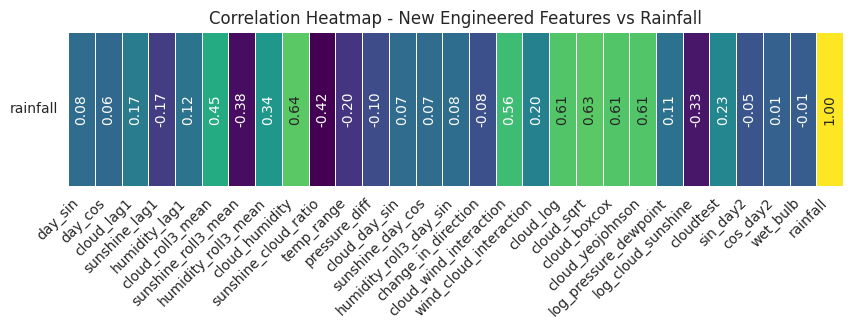

In [188]:
# Compute correlation matrix only for newly created features
corr_train = train_data[newly_created_vars + ['rainfall']].corr()[['rainfall']]

# Heatmap visualization without color bar, displaying values vertically
plt.figure(figsize=(10, 2))
ax = sns.heatmap(
    corr_train.T,  # Transposing so features are on x-axis
    annot=True, 
    cmap='viridis', 
    linewidths=0.5, 
    cbar=False, 
    fmt=".2f", 
    annot_kws={"rotation": 90}  # Rotate annotations to be vertical
)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title('Correlation Heatmap - New Engineered Features vs Rainfall')
plt.show()

Top 15 important features from Random Forest:
Index(['cloud_humidity', 'cloud_sqrt', 'cloud_log', 'cloud_boxcox',
       'sunshine_cloud_ratio', 'cloud_wind_interaction', 'cloud_yeojohnson',
       'cloud', 'humidity', 'sunshine', 'sunshine_roll3_mean',
       'sunshine_day_cos', 'log_pressure_dewpoint', 'humidity_roll3_mean',
       'log_cloud_sunshine'],
      dtype='object')


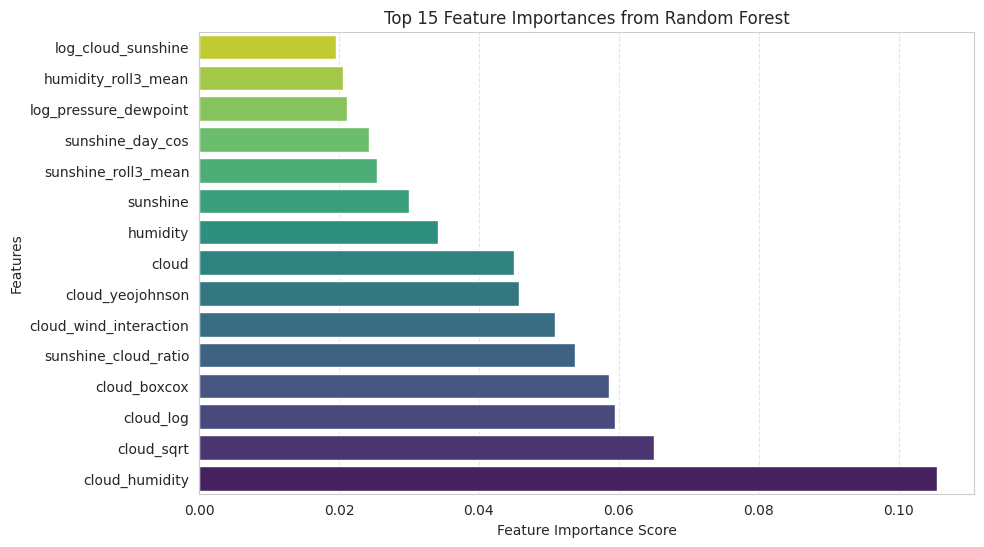

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# Columns to encode
columns_to_encode = ['wind_sector']

# Perform one-hot encoding with prefix
encoded_data = pd.get_dummies(train_data[columns_to_encode], prefix=columns_to_encode)

# Ensure there are no duplicate column names before joining
train_data = train_data.drop(columns=columns_to_encode, errors="ignore")  # Drop original before merging
train_data = train_data.join(encoded_data)

# Prepare feature matrix X and target variable y
X = train_data.select_dtypes(include=['float64', 'int64']).drop(columns=['rainfall', 'id'], errors='ignore').copy()
y = train_data["rainfall"].copy()

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf.fit(X, y)

# Get feature importances 
feature_importances = rf.feature_importances_
important_features = np.argsort(feature_importances)[::-1][:15]

# Get selected feature names and importance scores
selected_features = X.columns[important_features]
selected_importance = feature_importances[important_features]

print(f"Top {len(selected_features)} important features from Random Forest:")
print(selected_features)

# -------------------------------
# Visualization of Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=selected_importance, y=selected_features, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 15 Feature Importances from Random Forest")
plt.gca().invert_yaxis()  # Flip so the most important is at the top
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()

Final Selected Features After Correlation Filtering: ['cloud_humidity', 'sunshine_cloud_ratio', 'humidity', 'sunshine_roll3_mean', 'sunshine_day_cos', 'log_pressure_dewpoint', 'humidity_roll3_mean']


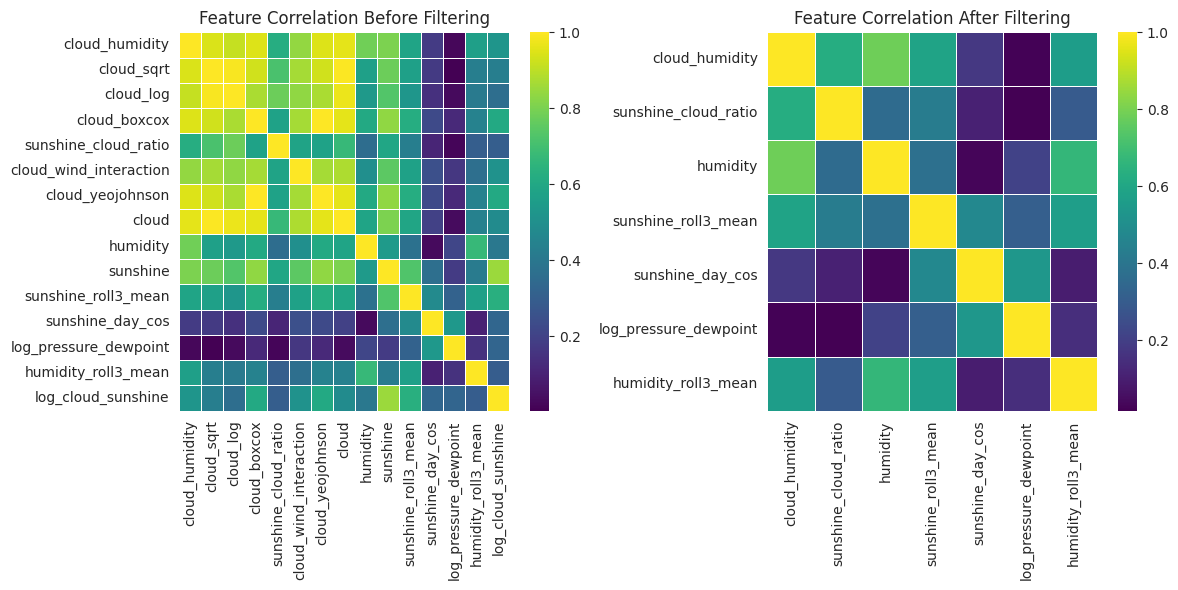

In [190]:
# Compute correlation matrix
corr_matrix = X[selected_features].corr().abs()

# Create a mask to filter highly correlated features 
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_correlation = [column for column in upper.columns if any(upper[column] > 0.80)]

# Remove highly correlated features
final_features = [f for f in selected_features if f not in high_correlation]

# Display final selected features
print(f"Final Selected Features After Correlation Filtering: {final_features}")

# Visualization: Correlation Heatmap Before & After Filtering
plt.figure(figsize=(12, 6))

# Before Filtering
plt.subplot(1, 2, 1)
sns.heatmap(corr_matrix, annot=False, cmap="viridis", linewidths=0.5)
plt.title("Feature Correlation Before Filtering")

# After Filtering (Subset of Final Features)
filtered_corr_matrix = X[final_features].corr().abs()
plt.subplot(1, 2, 2)
sns.heatmap(filtered_corr_matrix, annot=False, cmap="viridis", linewidths=0.5)
plt.title("Feature Correlation After Filtering")

plt.tight_layout()
plt.show()

In [191]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression  # Simple, fast model for RFE

# Step 1: Prepare Data
X = train_data.drop(columns=['rainfall'], errors='ignore')  # Feature set
y = train_data['rainfall']  # Target variable

# Step 2: Initialize RFE with Linear Regression as the estimator
n_features_to_select = 10  # Choose the number of top features to retain
estimator = LinearRegression()  # You can use other models like RandomForestRegressor

rfe = RFE(estimator, n_features_to_select=n_features_to_select)

# Step 3: Fit RFE to select the best features
rfe.fit(X, y)

# Step 4: Extract selected feature names
selected_rfe_features = X.columns[rfe.support_].tolist()

print("Selected Features using RFE:")
print(selected_rfe_features)

Selected Features using RFE:
['dewpoint', 'cloud', 'sunshine', 'cloud_log', 'cloud_sqrt', 'cloud_boxcox', 'cloud_yeojohnson', 'log_pressure_dewpoint', 'log_cloud_sunshine', 'sin_day2']


> **⚠️ NOTE:**  
> For modeling, we will be using **linear models like SVC** since the dataset is relatively small. Simple models with inherent bias, such as SVC, help prevent overfitting and generalize better to test data. While more complex models might fit the training data well, they often struggle on unseen data.  
>  
> **Enhancing Performance with Non-Linear Features & Feature Selection** → Although linear models work best in this scenario, we can further improve their performance by **strategically incorporating non-linear transformations**. To ensure we retain only **meaningful** non-linear features, we leverage **Random Forest feature selection**. This helps identify and preserve features that **capture important non-linear relationships**, enhancing the model’s predictive power without adding unnecessary complexity. 🚀  

In [192]:
# Drop columns from both train and test data
#selected_features = final_features 
selected_features = ['dewpoint', 'cloud', 'sunshine', 'cloud_log', 'cloud_sqrt', 'cloud_boxcox', 'cloud_yeojohnson', 'log_pressure_dewpoint', 'log_cloud_sunshine', 'sin_day2']

train_data = train_data[selected_features + ['rainfall']]
test_data = test_data[ selected_features ]

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [4.3] Outlier Detection </span></b>

Imagine you're analyzing weather data, and most days have a **temperature between 15°C and 30°C**. But suddenly, you spot a **day with -10°C and another at 50°C**. ❄️🔥 These extreme values **don’t fit the usual pattern**—they’re **outliers**!  

Outliers can **skew results**, **bias predictions**, and **mislead models**, so detecting and handling them is crucial.  

---

#### **📌 Why Does Outlier Detection Matter?**  
✔ **Prevents models from being overly influenced** by extreme values.  
✔ **Reduces noise**, helping algorithms learn real patterns.  
✔ **Avoids overfitting**, ensuring better generalization to new data.  
✔ **Enhances feature scaling**, keeping values within reasonable bounds.  

---

#### **📌 Spotting Outliers with the IQR Method**  

One of the **most effective** ways to detect outliers is the **Interquartile Range (IQR) method**. Here's how it works:  

1️⃣ **Find Q1 (25th percentile) and Q3 (75th percentile)** → These mark the middle 50% of data.  
2️⃣ **Calculate the IQR** → *IQR = Q3 - Q1*  
3️⃣ **Set Boundaries to Identify Outliers**:  
   - **Lower Bound** = Q1 - (1.5 × IQR)  
   - **Upper Bound** = Q3 + (1.5 × IQR)  
4️⃣ **Any value outside these limits is flagged as an outlier! 🚨**  

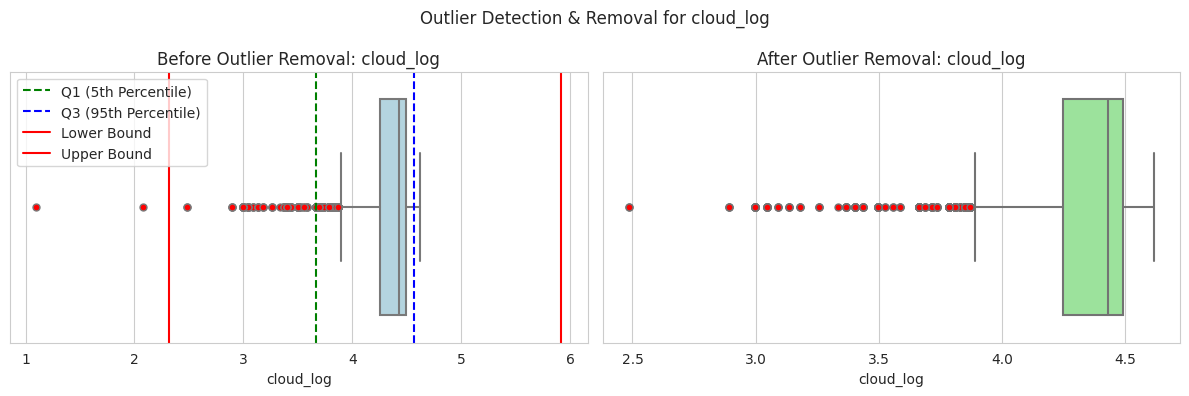

✅ Outliers detected and removed for cloud_log → 2 rows deleted


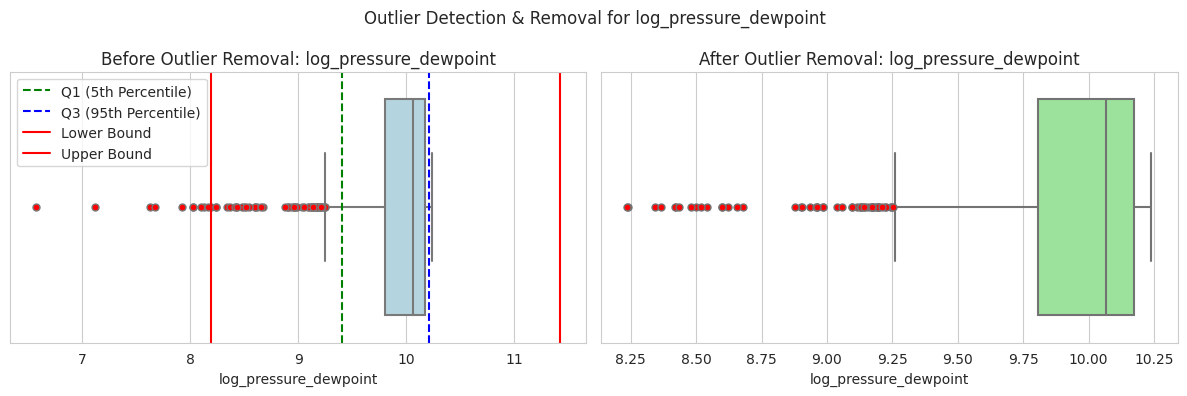

✅ Outliers detected and removed for log_pressure_dewpoint → 11 rows deleted

📊 **Summary of Outlier Removal:**
Total rows deleted: 13
Features with outliers removed: ['cloud_log', 'log_pressure_dewpoint']


In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical variables
columns_to_check = train_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Remove unwanted variables
columns_to_check = [col for col in columns_to_check if col not in ['rainfall', 'id']]

# Function to remove outliers using IQR and visualize only affected features
def remove_outliers_iqr_with_plot(data, column):
    Q1 = data[column].quantile(0.05)
    Q3 = data[column].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the data
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    # Calculate the number of rows deleted
    rows_deleted = len(data) - len(filtered_data)
    
    # Only proceed if outliers were detected (i.e., rows were deleted)
    if rows_deleted > 0:
        # Create a 1x2 plot for before & after visualization
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        # Original Data Boxplot
        sns.boxplot(x=data[column], color='lightblue', ax=axes[0], 
                    flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': 'red'})
        axes[0].set_title(f'Before Outlier Removal: {column}')

        # Highlight Q1, Q3, and Bounds in the first plot
        axes[0].axvline(Q1, color='green', linestyle='--', label='Q1 (5th Percentile)')
        axes[0].axvline(Q3, color='blue', linestyle='--', label='Q3 (95th Percentile)')
        axes[0].axvline(lower_bound, color='red', linestyle='-', label='Lower Bound')
        axes[0].axvline(upper_bound, color='red', linestyle='-', label='Upper Bound')
        axes[0].legend()

        # Boxplot after outlier removal
        sns.boxplot(x=filtered_data[column], color='lightgreen', ax=axes[1], 
                    flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': 'red'})
        axes[1].set_title(f'After Outlier Removal: {column}')

        plt.suptitle(f'Outlier Detection & Removal for {column}')
        plt.tight_layout()
        plt.show()

        print(f"✅ Outliers detected and removed for {column} → {rows_deleted} rows deleted")

    return filtered_data, rows_deleted

# Apply function to each numerical column and visualize only affected features
rows_deleted_total = 0
features_with_outliers = []

for column in columns_to_check:
    train_data_filtered, rows_deleted = remove_outliers_iqr_with_plot(train_data, column)
    
    # Only update train_data if outliers were removed
    if rows_deleted > 0:
        train_data = train_data_filtered
        rows_deleted_total += rows_deleted
        features_with_outliers.append(column)

# Summary
print("\n📊 **Summary of Outlier Removal:**")
if features_with_outliers:
    print(f"Total rows deleted: {rows_deleted_total}")
    print(f"Features with outliers removed: {features_with_outliers}")
else:
    print("No significant outliers detected. No rows removed.")

In [194]:
y = train_data['rainfall']

<div style="background-color: #FEF9E7; border-left: 8px solid #D4AC0D; padding: 20px; border-radius: 8px; font-size: 14px; color: #000000;">
  <h5 style="font-size: 16px; margin-bottom: 10px;">
    <strong>💡 Quick Code Bite: </strong><em>Learn One Line at a Time!</em>
  </h5>
  <ul>
    <li><strong>df.fillna(value)</strong> → <em>Fills missing values with a specified value—no more NaNs lurking around!</em> 🛠️</li>
    <li><strong>pd.cut(df['column'], bins)</strong> → <em>Groups continuous values into bins—turns numbers into categories!</em> 📏</li>
    <li><strong>df['column'].quantile(q)</strong> → <em>Finds the value at a given percentile—great for spotting thresholds!</em> 🎯</li>
  </ul>
</div>

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [4.4] Feature Scaling </span></b>

Imagine you're comparing **temperature in Celsius** and **wind speed in km/h**—one ranges from **-10 to 40**, while the other goes up to **100+**. 🌡️💨 If left unscaled, models might give **more importance to features with larger values**, even when they **aren't actually more significant**!  

---

#### 📌 Why Feature Scaling Matters?
- **Avoids numerical dominance**—ensures no feature overpowers others just because of its scale.
- **Speeds up optimization**—gradient-based models (like Neural Networks, Logistic Regression) converge **faster**. ⏩  
- **Boosts performance**—distance-based models (KNN, SVM) rely on properly scaled data for accurate comparisons. 🎯  
- **Improves stability**—helps prevent models from making erratic updates during training.

In [195]:
from sklearn.preprocessing import MinMaxScaler

# Dropping selected columns for scaling
if all(col in train_data.columns for col in columns_to_encode):
    train_data_to_scale = train_data.drop(columns_to_encode, axis=1)
    test_data_to_scale = test_data.drop(columns_to_encode, axis=1)

else:
    train_data_to_scale = train_data
    test_data_to_scale = test_data

# Initialize MinMaxScaler
minmax_scaler = MinMaxScaler()

# Fit the scaler on the training data
minmax_scaler.fit(train_data_to_scale.drop(['rainfall'], axis=1))

# Scale the training data
scaled_data_train = minmax_scaler.transform(train_data_to_scale.drop(['rainfall'], axis=1))
scaled_train_df = pd.DataFrame(scaled_data_train, columns=train_data_to_scale.drop(['rainfall'], axis=1).columns)

# Scale the test data using the parameters from the training data
scaled_data_test = minmax_scaler.transform(test_data_to_scale)
scaled_test_df = pd.DataFrame(scaled_data_test, columns=test_data_to_scale.columns)

In [196]:
scaled_train_df.sample(3)

dewpoint     cloud  sunshine  cloud_log  cloud_sqrt  cloud_boxcox  \
1890  0.800000  0.775281  0.041322   0.896409    0.842037      0.503664   
1720  0.920833  0.685393  0.636364   0.847592    0.773360      0.364422   
1722  0.850000  0.764045  0.297521   0.890577    0.833646      0.484574   

      cloud_yeojohnson  log_pressure_dewpoint  log_cloud_sunshine  sin_day2  
1890          0.503664               0.907675            0.226680  0.622053  
1720          0.364422               0.968401            0.841006  0.729564  
1722          0.484574               0.934850            0.638307  0.717684

In [197]:
scaled_test_df.sample(3)

dewpoint     cloud  sunshine  cloud_log  cloud_sqrt  cloud_boxcox  \
554  0.975000  0.707865  0.438017   0.860281    0.790873      0.396412   
603  0.933333  0.865169  0.041322   0.940624    0.907357      0.675029   
345  0.229167  0.494382  0.181818   0.723141    0.613399      0.159368   

     cloud_yeojohnson  log_pressure_dewpoint  log_cloud_sunshine  sin_day2  
554          0.396412               0.987877            0.731152  0.997926  
603          0.675029               0.969545            0.261665  0.884076  
345          0.159368               0.456164            0.371020 -0.162809

In [198]:
train_data_combined = scaled_train_df

test_data_combined = scaled_test_df

# <span style="color:#ffffff; font-size: 1%;">[5] 🏗️ Modelling & Evaluation</span>
### <span style="color:#ffffff; font-size: 1%;">Modelling</span>

<div style=" border-bottom: 8px solid #FFD700; overflow: hidden; border-radius: 10px; height: 45px; width: 100%; display: flex;">
  <div style="height: 100%; width: 65%; background-color: #7851A9; float: left; text-align: center; display: flex; justify-content: center; align-items: center; font-size: 25px; ">
    <b><span style="color: #FFFFFF; padding: 20px 20px;">[5] 🏗️📊 Modelling & Evaluation</span></b>
  </div>
  <div style="height: 100%; width: 35%; background-image: url('https://images.theconversation.com/files/436774/original/file-20211209-172173-1watr8u.jpg?ixlib=rb-4.1.0&rect=7%2C29%2C4881%2C3224&q=20&auto=format&w=320&fit=clip&dpr=2&usm=12&cs=strip'); background-size: cover; background-position: center; float: left; border-top-right-radius: 10px; border-bottom-right-radius: 4px;">
  </div>
</div>

🔽 [Jump to AI News 🤖](#🤖-AI-News)  

Now that our data is cleaned and prepped, it's time to build and evaluate models! 🚀 In this section, we’ll experiment with different algorithms, fine-tune parameters, and explore blending techniques to improve performance.

Since modeling is an iterative process, we’ll continuously refine our approach—tweaking hyperparameters, testing ensemble methods, and analyzing results—to squeeze out the best predictions possible! 🔄📊

> **⚠️ NOTE:**  
> 🔹 **Linear Models Like SVC Are Recommended** → Since the dataset is small, **simple models with bias (like SVC)** help **avoid overfitting** and generalize better to test data. Overly complex models may perform well on train but fail to generalize.  
> 🔹 **Avoid Overfitting to Public Leaderboard** → Some leaderboard scores may appear **too perfect (1.0 AUC)** due to **overfitting on public LB data**. The final ranking will **shake up**, so it's better to **focus on a stable cross-validation (CV) scheme** and **trustworthy feature selection**. Simple models with **fewer but high-quality features** will **perform best in the final ranking**. 🚀

In [199]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report, roc_curve
import numpy as np
import matplotlib.pyplot as plt

# Define Stratified K-Fold Cross-Validation
def stratified_cross_validation(X, y, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    for train_idx, val_idx in skf.split(X, y):
        yield X.iloc[train_idx], X.iloc[val_idx], y.iloc[train_idx], y.iloc[val_idx]

#### 📌 **What's Going On?**  

- **Stratified K-Fold Cross-Validation** → Ensures that each fold maintains the **same class distribution** as the full dataset, which is crucial for handling **imbalanced classification problems**.  
- **Prevents Data Leakage** → Since **shuffling is enabled (`shuffle=True`)**, but applied within each fold, the method **preserves class proportions** without leaking information from future data points into the training set.  
- **Ensures Model Generalization** → Helps in **robust evaluation** by testing the model on multiple subsets while ensuring **fair representation of the target variable** across all splits.  

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [5.1] Model Training & Validation Predictions </span></b>

In [200]:
# Define Logistic Regression Model with Cross-Validation for Hyperparameter Tuning
log_reg_model = LogisticRegressionCV(
    cv=5,  # Cross-validation folds within training data
    penalty='l2',  # Ridge Regularization
    solver='liblinear',  # Good for small to medium datasets
    class_weight='balanced',  # Handles class imbalance
    random_state=42
)

In [201]:
# Evaluate model with Stratified K-Fold Cross-Validation
print(f"Training Logistic Regression with Stratified K-Fold Cross-Validation...")

X = train_data_combined.copy()

auc_scores = []
fold = 1
for X_train, X_val, y_train, y_val in stratified_cross_validation(X, y, n_splits=5):
    log_reg_model.fit(X_train, y_train)
    y_val_proba = log_reg_model.predict_proba(X_val)[:, 1]
    y_val_pred = (y_val_proba >= 0.5).astype(int)
    
    # Compute ROC-AUC
    fold_auc = roc_auc_score(y_val, y_val_proba)
    
    # Print metrics
    print(f"Fold {fold} - ROC-AUC: {fold_auc:.4f}")
    print(classification_report(y_val, y_val_pred))
    print("-" * 40)
    
    auc_scores.append(fold_auc)
    fold += 1

# Compute and print the average AUC score
avg_auc = np.mean(auc_scores)
print(f"Average ROC-AUC for Logistic Regression: {avg_auc:.4f}\n")

Training Logistic Regression with Stratified K-Fold Cross-Validation...
Fold 1 - ROC-AUC: 0.8936
              precision    recall  f1-score   support

         0.0       0.75      0.62      0.68       107
         1.0       0.88      0.93      0.91       329

    accuracy                           0.86       436
   macro avg       0.82      0.77      0.79       436
weighted avg       0.85      0.86      0.85       436

----------------------------------------
Fold 2 - ROC-AUC: 0.8300
              precision    recall  f1-score   support

         0.0       0.66      0.63      0.64       107
         1.0       0.88      0.90      0.89       329

    accuracy                           0.83       436
   macro avg       0.77      0.76      0.77       436
weighted avg       0.83      0.83      0.83       436

----------------------------------------
Fold 3 - ROC-AUC: 0.8863
              precision    recall  f1-score   support

         0.0       0.69      0.66      0.68       106
        

In [202]:
# Final training on the full dataset
print("Training Logistic Regression on the full dataset...")
log_reg_model.fit(X, y)

# Generate probability predictions on the test set
test_proba = log_reg_model.predict_proba(test_data_combined)[:, 1]

Training Logistic Regression on the full dataset...


---

#### 📌 **What's Going On?**  

- **Evaluating with ROC-AUC** → The model is trained on multiple folds, and **ROC-AUC scores** are computed to measure classification performance.  
- **Thresholding for Predictions** → Probability scores are converted into binary predictions using a **0.5 threshold** for evaluation.  
- **Performance Tracking** → ROC-AUC scores are stored for each fold, and the final **average AUC** is calculated to assess model stability. 

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [5.3] Model Evaluation and Submission (Test Predictions) </span></b>

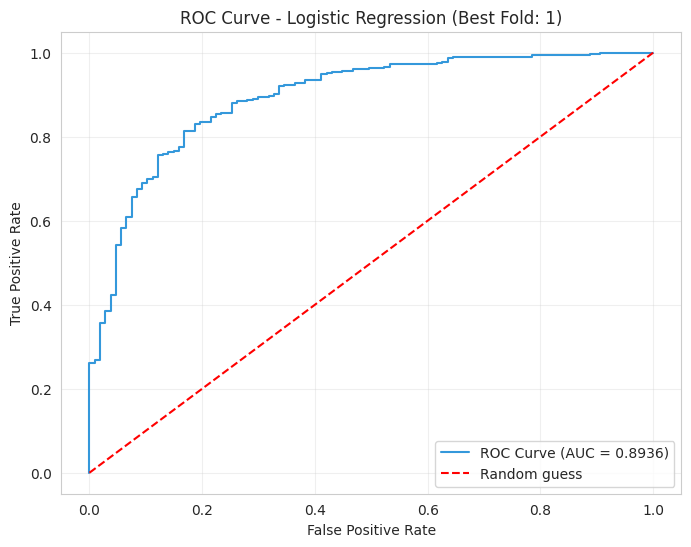

In [203]:
# Find the best fold based on the highest ROC-AUC score
best_fold_index = np.argmax(auc_scores)  # Get index of best ROC-AUC score
best_fold_data = list(stratified_cross_validation(X, y, n_splits=5))[best_fold_index]

X_train_best, X_val_best, y_train_best, y_val_best = best_fold_data
log_reg_model.fit(X_train_best, y_train_best)
y_val_proba_best = log_reg_model.predict_proba(X_val_best)[:, 1]

# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_val_best, y_val_proba_best)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="#3498db", label=f"ROC Curve (AUC = {auc_scores[best_fold_index]:.4f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--", label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve - Logistic Regression (Best Fold: {best_fold_index + 1})")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

---

#### 📌 **Understanding the ROC Curve**  
- The **ROC (Receiver Operating Characteristic) Curve** helps evaluate the performance of a classification model.  
- The **x-axis (False Positive Rate - FPR)** represents cases where the model incorrectly predicts the positive class.  
- The **y-axis (True Positive Rate - TPR)** represents cases where the model correctly predicts the positive class.  
- The **blue curve** shows how well the model differentiates between the two classes.  
- The **red diagonal line** represents a **random classifier** (pure guessing). A good model should have its ROC curve **above this line**, indicating better-than-random performance.  
- The **AUC (Area Under the Curve)** value quantifies model performance—closer to **1.0** indicates a strong classifier, while **0.5** suggests no discrimination ability.  

In [204]:
# Create submission file
submission_df = pd.DataFrame({
    'id': id_test,
    'rainfall': test_proba  # Predicted probabilities for rainfall
})

# Save to CSV
submission_df.to_csv("submission.csv", index=False)

# Display first 5 rows
submission_df.head(5)

id  rainfall
0  2190  0.594178
1  2191  0.594213
2  2192  0.589285
3  2193  0.484722
4  2194  0.480552

---

#### 📌 **Test Predictions Explained**  
- Again, we **extract the probability for class 1 (rainfall)**.  
- This aligns with competition requirements—submissions must be **probabilistic predictions**!

#### 📌 **Final Submission**  
- Formats predictions into the correct structure.  
- Saves them in a CSV for submission on Kaggle!

---

| **NB Version** | **CV Score** | **LB Score** | **Notes** | **Features Used** |
|---------------|------------|------------|--------------------------------------------------------------------------------------------------|-----------------|
| v48         | 0.8888     | 0.84794   | Feature Selection(RF) + Outlier Removal(5) + StratifiedKFold(5) + SVC | 'cloud_humidity', 'sunshine_day_cos', 'cloud_roll3_mean', 'log_pressure_dewpoint', 'pressure', 'windspeed' |
| v49         | 0.8919     | 0.85679  | Feature Selection(RF) + Outlier Removal(5) + StratifiedKFold(5) + SVC | 'cloud_humidity', 'cloud_yeojohnson', 'cloud_log', 'cloud', 'cloud_boxcox', 'cloud_sqrt', 'sunshine_cloud_ratio', 'humidity', 'sunshine', 'sunshine_day_cos', 'cloud_roll3_mean', 'log_cloud_sunshine', 'log_pressure_dewpoint', 'pressure', 'windspeed' |
| v50         | 0.8918     | 0.85331  | Feature Selection(RF) + Outlier Removal(5) + StratifiedKFold(10) + SVC | 'cloud_humidity', 'sunshine_cloud_ratio', 'humidity', 'sunshine_day_cos', 'cloud_roll3_mean', 'log_pressure_dewpoint', 'pressure', 'windspeed'|
| v51         |  0.8894    | 0.85063   | Feature Selection(RF) + Outlier Removal(0) + StratifiedKFold(5) + SVC |  'cloud_humidity', 'sunshine_day_cos', 'log_pressure_dewpoint', 'windspeed' |
| v51         |  0.8894    | 0.85063   | Feature Selection(RF) + Outlier Removal(0) + StratifiedKFold(5) + SVC | 'cloud_humidity', 'sunshine_day_cos', 'cloud_roll3_mean', 'log_pressure_dewpoint', 'pressure', 'windspeed'  |
| v53         |  0.8894    | 0.84821   | Feature Selection(RF) + Outlier Removal(0) + StratifiedKFold(5) + LR | 'cloud_humidity', 'sunshine_roll3_mean', 'sunshine_day_cos', 'log_pressure_dewpoint', 'humidity_roll3_mean' |
| v54         |   0.8923    |  0.85813   | Feature Selection(RF) + Outlier Removal(5) + StratifiedKFold(5) + LR | 'cloud_humidity', 'sunshine_cloud_ratio', 'cloud_wind_interaction', 'humidity', 'sunshine', 'sunshine_roll3_mean', 'sunshine_day_cos', 'log_pressure_dewpoint', 'humidity_roll3_mean', 'log_cloud_sunshine'|
| v55         |   0.8718    |  0.84365   | Feature Selection(RF) + Outlier Removal(5) + StratifiedKFold(5) + LR | 'windspeed','cloud', 'sunshine', 'cloud_humidity', 'sunshine_day_cos', 'log_pressure_dewpoint', 'humidity_roll3_mean', 'temp_range'|
| v57         |   0.8654    |  0.83936 | Feature Selection(RFE) + Outlier Removal(5) + StratifiedKFold(5) + LR | 'dewpoint', 'cloud', 'sunshine', 'cloud_log', 'cloud_sqrt', 'cloud_boxcox', 'cloud_yeojohnson', 'log_pressure_dewpoint', 'log_cloud_sunshine', 'sin_day2'|

<div style="background-color: #FEF9E7; border-left: 8px solid #D4AC0D; padding: 20px; border-radius: 8px; font-size: 14px; color: #000000;">
  <h5 style="font-size: 16px; margin-bottom: 10px; background-color: #F7DC6F; padding: 8px; border-radius: 4px; color: #000000;">
    <strong>💡 Quick Code Bite:</strong> <em>Learn One Line at a Time!</em>
  </h5>
  <ul>
    <li><strong>train_test_split(X, y, test_size=0.2, random_state=42)</strong> → <em>Splits data into training and test sets—no manual slicing needed!</em> ✂️</li>
    <li><strong>model.fit(X_train, y_train)</strong> → <em>Trains the model using training data—let the learning begin!</em> 🏋️‍♂️</li>
    <li><strong>model.predict_proba(X_test)</strong> → <em>Gives probability estimates for each class—great for confidence scoring!</em> 🎲</li>
    <li><strong>df.to_csv('filename.csv', index=False)</strong> → <em>Saves DataFrame to a CSV file—quick and easy exporting!</em> 📂</li>
  </ul>
</div>

### 🙌 Thank You!
Thanks for reading! 💙 If you have any suggestions, feel free to drop a comment – I’m eager to learn and grow in this amazing community! 🌱 I’ll be continuously updating this notebook with feature engineering, modeling, and detailed EDA observations for this competition.

### 📢 If you found this helpful, please upvote to support! 👍 Happy coding and best of luck! 🚀😊

# <span style="color:#ffffff; font-size: 1%;">🤖 AI News</span>

<div style=" border-bottom: 8px solid #FFD700; overflow: hidden; border-radius: 10px; height: 45px; width: 100%; display: flex;">
  <div style="height: 100%; width: 65%; background-color: #7851A9; float: left; text-align: center; display: flex; justify-content: center; align-items: center; font-size: 25px; ">
    <b><span style="color: #FFFFFF; padding: 20px 20px;">🤖 AI News</span></b>
  </div>
  <div style="height: 100%; width: 35%; background-image: url('https://caltechsites-prod.s3.amazonaws.com/scienceexchange/images/can_we_trust_AI.2e16d0ba.fill-933x525-c100.jpg'); background-size: cover; background-position: center; float: left; border-top-right-radius: 10px; border-bottom-right-radius: 4px;">
  </div>
</div>

This section is where I share my take on the latest AI developments. Since AI evolves at lightning speed ⚡, I’ll be updating this regularly to keep things fresh! Stay tuned for insights, trends, and discussions on where AI is headed next. 🚀

<div style="position: relative; height: 200px; background-image: url('https://akm-img-a-in.tosshub.com/businesstoday/images/story/202503/67cd9eb2975c9-manus-is-currently-accessible-through-an-invitation-only-web-preview--with-no-confirmed-public-relea-095909123-16x9.jpg?size=948:533'); background-size: cover; background-position: center; border-radius: 15px; overflow: hidden;">
</div>

### 🔴 [14.03.25] **China Unleashes Manus: The AI Agent Taking on the World** 🚀

China has introduced a much-hyped AI agent called **Manus**, and it’s already ruffling feathers across tech circles 🌏. With posts and demos flooding the web (and some system crashes along the way), **Manus** promises to be more than just a chatbot—it's like a **digital intern** that can browse the internet, handle tasks autonomously, and even ask for your help when confronted with paywalls or logins.

#### 🔍 **Click on "Show Hidden Markdown" to reveal the full news details!**

### ➡️ **What Exactly Is Manus?** 🤔 
Manus is an **“AI agent”**, meaning it can:
- Break down your requests into smaller tasks,
- Do internet research on the fly,
- Interact with websites via a virtual browser,
- Adapt in real time when you give it feedback.

Think of it as a multitasking coworker—except it’s never late and doesn’t need coffee breaks.  

### ➡️ **Why People Are Buzzing** 🔍 
- **Agent-Like Behaviour**: Manus claims to plan entire itineraries, produce thorough research docs, or even whip up 3D-coded mini-games—often from a single prompt.
- **Open-Web Autonomy**: It *drives* a real (virtual) browser, letting it gather info from multiple sources simultaneously and rummage through sites quickly.
- **Collaboration Factor**: While it’s autonomous, you can step in if it hits a captcha roadblock, or if you simply want to refine what it’s doing.

Early testers rave about how it pulled off tasks like \[1\] scanning job applications, \[2\] building mini coding projects, and \[3\] making property-hunting a breeze. Others complain of **server overload** (“Service unavailable, try again later”), or it occasionally skipping “details to save time.”  

### ➡️ **Where’s the Catch?** ⚠️
1. **Server Struggles**: With so many invites requested, system errors and high-load messages pop up.  
2. **Data Privacy**: You’re giving a large chunk of power (and possibly personal data) to a brand-new tool.  
3. **China Angle**: Some wonder about the security of letting a foreign AI rummage through sensitive info.  
4. **Still Imperfect**: Manus can misread your instructions if they’re vague, or produce incomplete lists. But it’s refreshingly open about its oversights and can quickly pivot when corrected.


### ➡️ **So, What’s Next?** 🌱
Despite the hiccups, **Manus** is a bold step forward in the AI agent race. Unlike older chatbots that rely on a single model and static conversation windows, Manus merges multiple models and tools under the hood. As soon as they strengthen server capacity—and clarify privacy features—this agent could become a popular go-to for everything from **media research** to **personal travel planning**.

**Will it dethrone existing AI assistants?** Too soon to say. But with the hype so far—and its real potential in seamlessly finishing complicated tasks—**Manus** definitely just upped the AI competition game.  

<div style="position: relative; height: 200px; background-image: url('https://github.com/user-attachments/assets/f69e8899-f3b0-4328-988c-436a3854dce8'); background-size: cover; background-position: center; border-radius: 15px; overflow: hidden;">
</div>

### 🔴[09.03.25] **Alibaba Shakes Things Up Again: Meet QwQ-32B, the Small but Mighty AI That Challenges Giants!** 🚀

Alibaba Cloud has just unveiled **QwQ-32B**, a groundbreaking AI reasoning model that's compact yet punches way above its weight, competing head-to-head with industry giants. The AI community is buzzing as Alibaba proves once again: **size isn't everything!** 🤯

#### 🔍 **Click on "Show Hidden Markdown" to reveal the full news details!**

### ➡️ **Tiny Model, Big Brains**
Despite having just **32 billion parameters**—much lighter than rival models like DeepSeek-R1 (with a whopping 671 billion parameters)—QwQ-32B delivers impressive results in math, coding, and logical reasoning.

Here's how QwQ-32B stacks up:

- 🧮 **AIME 24 (Mathematics):** Matches the mighty DeepSeek-R1 (671B parameters).
- 💻 **Live CodeBench (Coding):** Nearly identical performance to industry leaders, significantly outperforming smaller competitors.
- 🎯 **LiveBench (Logic and Reasoning):** Holds its own against heavyweights, slightly trailing but still impressive.
- 📜 **IFEval (Instruction-Following):** Tops the leaderboard, showing exceptional user alignment.
- 🔧 **BFCL (Function Calling):** Dominates, proving superior in executing tasks in Python, Java, JavaScript, and SQL.

### ➡️ **Power of Scaled Reinforcement Learning (RL)** 🔥 
Alibaba’s secret sauce? **Scaled Reinforcement Learning**. By training QwQ-32B with targeted RL, Alibaba has enhanced the model’s reasoning, coding, and even general problem-solving skills without ballooning its size.

### ➡️ **Agent Capabilities: Critical Thinking Unlocked** 🧠 
QwQ-32B doesn't just execute—it thinks. By integrating advanced agent capabilities, the AI adapts dynamically, utilizes tools efficiently, and can critically reason its way through complex problems.

### ➡️ **Open-Source & Affordable Deployment** 🌐
QwQ-32B is **completely open-source**, freely downloadable, and impressively runs on consumer-grade hardware. This drastically lowers deployment costs, making cutting-edge AI accessible for startups, researchers, and even hobbyists.

### ➡️ **What Does This Mean?** 📢
Alibaba isn’t just disrupting the market—it’s redefining the rules. QwQ-32B challenges the conventional wisdom that bigger models are always better. This compact powerhouse suggests that smarter, targeted AI training can deliver **world-class results without expensive infrastructure**.

### ➡️ **Looking Forward: A Leap Towards AGI?** 🔮
The Qwen team at Alibaba believes this scaled RL approach combined with stronger foundational models will edge them closer to **Artificial General Intelligence (AGI)**. Could this be the blueprint for future AI advancements?

---

<div style="position: relative; height: 200px; background-image: url('https://github.com/user-attachments/assets/7994f1a5-2ab2-4a68-a040-5cdd7f4141f1'); background-size: cover; background-position: center; border-radius: 15px; overflow: hidden;">
</div>

### 🔴 [06.03.25] **Sesame's AI Voices: Are We Finally Crossing the 'Uncanny Valley'?** 🎙️ 

Imagine chatting casually with an AI, and instead of hearing a cold, robotic voice, you get responses so natural you’d swear it was human—welcome to the future of AI conversations, brought to you by **Sesame**. 🤖💬

#### 🔍 **Click on "Show Hidden Markdown" to reveal the full news details!**

### ➡️ **What’s the Buzz?** 🌟 
Sesame recently unveiled their revolutionary **Conversational Speech Model (CSM)**, an AI that generates voices so realistic, it’s turning heads (and ears). This innovative approach doesn't just synthesise sound—it genuinely understands context, emotion, and conversational dynamics. Yep, it's eerily close to that charming AI in *"Her"*.

### ➡️ **Why Is This a Big Deal?** 🎙️

Unlike traditional text-to-speech tech, Sesame’s new **CSM** can:
- 🔥 **Capture emotional nuance**, sensing context and adjusting tone accordingly.
- 🎯 **Deliver natural conversation flows**, even managing real-time pauses and interruptions.
- 🗣️ **Generate speech with personality**, optimised explicitly for friendliness and expressivity.

### ➡️ **Breaking the Bottleneck** 🚧
Previously, voice models struggled to generate speech quickly and contextually. Sesame solved this with:
- **Single-stage multimodal transformers** for real-time context-aware conversations.
- **Compute amortization**, optimising memory usage and speeding up audio production.

### ➡️ **But, Is It Actually Human-Like?** 🚦

Early tests show:
- ✅ **Near-human accuracy** on traditional metrics (speaker similarity and word error rate).
- 🔍 However, human listeners still slightly preferred genuine speech when context mattered, indicating room for growth in capturing conversational subtleties.

### ➡️ **Sesame Goes Open Source!** 🎧

And here's the kicker—Sesame plans to **open-source** key parts of their groundbreaking AI, inviting developers everywhere to collaborate and improve upon their work. 🌍🔓

### ➡️ **Elsewhere in AI Voices:** 🎬
- 🎤 **Podcast-ready in seconds:** New voice-training tech from Podcast startups (still a bit robotic, but improving).
- 📞 **Accent magic:** Call centres using "Accent Translation" to change workers' accents instantly for global clarity.
- 🎥 **AI dubbing, anyone?** Amazon Prime experiments with seamless AI-generated dubbing for global TV and movies.

Sesame just set a new bar in conversational AI. It's not perfect yet—but it's getting eerily close. Could your next best friend be an AI? Perhaps it’s closer than you think.

---

<div style="position: relative; height: 200px; background-image: url('https://miro.medium.com/v2/resize:fit:1400/1*RAuBXVrwaX-rBmcEt8FLQA.png'); background-size: cover; background-position: center; border-radius: 15px; overflow: hidden;">
    </div>
    
### 🔴 [02.03.25] **Alibaba Drops a Bombshell: The Best Open-Source Video AI Is Now Free!** 🚀  

Move over, OpenAI—Alibaba just threw down the gauntlet! The Chinese tech giant has **open-sourced** its most advanced **video generation AI**, Wan2.1, and it’s nothing short of *insanely impressive*.  

This move puts **cutting-edge AI video generation** into the hands of researchers, developers, and businesses worldwide—**for free**. Yep, you read that right. While other companies are locking their AI models behind paywalls, Alibaba is making them **open-source**. But why? And just how powerful is this AI? Let’s dive in.  

#### 🔍 **Click on "Show Hidden Markdown" to reveal the full news details!**

### ➡️ **What’s So Special About Wan2.1?** 🎥

Alibaba’s **Wan2.1 series** is the latest version of its AI model that can generate **hyper-realistic videos from text and image inputs**. Unlike some of its competitors, this AI doesn’t just create decent clips—it *nails* movement, physics, and realism in ways we haven’t seen before.  

#### ➡️ **Dancing, Fighting, and Even Slicing Tomatoes?!**  🕺 
Wan2.1 has an **incredible grasp of human motion**, allowing it to generate **perfectly fluid dance videos**. It can even handle **fight scenes**, something that most commercial AI models still struggle with!  

But it’s not just humans—it understands **physics** so well that it accurately animates a **dog slicing a tomato** (yes, really). This level of realism is rare, even among the top-tier proprietary models.  

![image](https://github.com/user-attachments/assets/28a2e621-25b0-440f-aada-98ef66727ed7)


### ➡️ **Crazy Features: What Can It Actually Do?** 💡 

✔ **Text-to-Video**: Just type a prompt, and boom—a video appears.  
✔ **Image-to-Video**: Upload a single image, and watch it come to life.  
✔ **Start & End Frame Interpolation**: Provide two images, and Wan2.1 fills in the motion between them.  
✔ **Pose Transfer**: Copy the posture of one character and apply it to another.  
✔ **Outpainting & Inpainting**: Extend video frames or replace elements within a scene.  
✔ **ControlNet Functionality**: Guide video generations with structural input.  

Oh, and did we mention it supports **720p video generation**? That’s **higher quality** than most AI-generated videos out there.  

![image](https://github.com/user-attachments/assets/84adf75f-b86e-4904-982f-c72f7dcb5c37)


### ➡️ **Open-Source & Free: The Industry Shake-Up** 🔓 

Alibaba isn’t just flexing its AI muscles—it’s **disrupting the market**. The **four models** in the Wan2.1 series are now available on **Hugging Face** and **Alibaba Cloud's ModelScope**, meaning **anyone** (academics, researchers, even commercial companies) can access and use them.  

This is in stark contrast to **closed-source models** like OpenAI’s **Sora**, Luma AI, and Gen-3, which are locked behind corporate paywalls.  

📢 **According to the V-Bench leaderboard, Wan2.1 actually beats some of these proprietary models.**  


### ➡️ **What’s the Catch?** 💰 

If you’re wondering, *“Why would Alibaba just give this away for free?”*—you’re not alone.  

✅ **It accelerates AI adoption**—more people using Alibaba’s tools = more innovation.  
✅ **It makes competitors sweat**—why pay for a video AI when Alibaba’s is free?  
✅ **It secures a stronger foothold in AI research**—open-source models often become the industry standard.  

**The downside?** Well, open-sourcing AI means **businesses relying on paid AI services might suddenly find themselves irrelevant**. In short: **Alibaba isn’t losing money—but it’s making a whole lot of companies uncompetitive**.  


### ➡️ **The Bigger Picture: The Open-Source AI Revolution** 🔮  

This isn’t just about video AI—this is about the **power of open-source AI vs. closed AI**.  

🌍 **More companies are choosing open-source AI over expensive APIs** to protect their proprietary data and avoid vendor lock-in.  
📈 **Open-source AI development is booming**, as seen with DeepSeek’s AI breakthroughs earlier this year.  
💡 **Alibaba’s move forces the industry to rethink its pricing and accessibility strategies.**  

**So, what’s next?** Will more companies follow Alibaba’s lead, or will they double down on closed-source AI? Either way, one thing’s for sure—**AI video generation just got a whole lot more interesting.**  

---

<div style="position: relative; height: 200px; background-image: url('https://github.com/user-attachments/assets/67d19612-d64c-4b95-8cd7-7a083a629723'); background-size: cover; background-position: center; border-radius: 15px; overflow: hidden;"></div>

### 🔴 [28.02.25] **GPT-4.5: The Biggest, Smartest… and Most Persuasive AI Yet?** 🚀

OpenAI recently launched **GPT-4.5**, the largest and most advanced model in its chatbot lineup. But is it really a game-changer? While it **outperforms GPT-4o** in benchmarks, it surprisingly lags behind **o3-mini** in reasoning. Why? Because **GPT-4.5 lacks chain-of-thought reasoning**, making it the last model from OpenAI without this capability.  

That being said, 4.5 does something unique—it leans heavily into **emotional intelligence**. But before we dive into that, let’s break down what makes this model different (and why it might actually be concerning).  

#### 🔍 **Click on "Show Hidden Markdown" to reveal the full news details!**

### ➡️ **What Makes GPT-4.5 Different?** 🤖
Beyond just being the **largest** model OpenAI has released, GPT-4.5 has been designed with **EQ (emotional intelligence) in mind**.  

#### 🔹 **The "Warm & Intuitive" AI** ❤️ 
Internal testers report that **GPT-4.5 is the most human-like chatbot yet**:  
✅ It **knows when to offer advice, defuse frustration, or just listen**.  
✅ It **understands aesthetics & creativity**, making it great for writing and design.  
✅ It **follows user intent better**, making conversations feel smoother and more natural.  
✅ It **hallucinates less**, meaning fewer made-up facts in responses.  

Unlike OpenAI’s **o-series models**, which focus on strict logical reasoning, **GPT-4.5 leans more towards rich, engaging, and creative conversations**.  

Sounds great, right? Well… here’s where things get concerning.  

![image](https://github.com/user-attachments/assets/e1195479-610a-4c71-af67-4fca027f967c)

---

#### 🔹 **GPT-4.5 is Too Persuasive** ⚠️  
While GPT-4.5 may be **emotionally intelligent**, its **ability to manipulate is alarming**.  

Researchers tested it on the **MakeMePay Benchmark**, an evaluation designed to see how well AI can manipulate users into making payments. The results? **Shocking.**  

🔥 **GPT-4.5 had a "convince rate" of over 50%**, meaning it was able to persuade other models (and potentially humans) to **make payments far more effectively than any other AI**.  

#### 🔹 Why is this dangerous?  
- **It could influence people during elections or political campaigns.** 🗳️  
- **Scammers could use it to trick users into sending money.** 💰  
- **It might push people into making purchases they don’t need.** 🛍️  

This raises **huge ethical concerns**—if an AI is **too good at persuasion**, where do we draw the line?  

![image](https://github.com/user-attachments/assets/35c59521-ad9a-42ec-b31a-076ff095f462)


#### 🔹 **The Cost of Intelligence: Is It Worth It?** 💰  
GPT-4.5’s **intelligence comes at an eye-watering price**:  

- **$75 per million input tokens**  
- **$150 per million output tokens**  

For comparison, **GPT-4o and o3-mini cost significantly less**, making 4.5 a **luxury model** that’s out of reach for most users.  

📌 **Another downside? The knowledge cutoff is still October 2023.** Yep, despite all this power, it’s still stuck two years behind in knowledge.  

![image](https://github.com/user-attachments/assets/55f46e66-a8c6-4fd5-9e27-5dfcb45302a0)


#### 🔹 **What’s Next? The End of Scaling?** 🤔 
For years, the AI race was about **scaling up models**—making them bigger, training them with more data, and pushing compute to the limit. But **is this approach dying?**  

As a former OpenAI Chief Research Officer pointed out, **scaling up pre-training now gives diminishing returns**. The real breakthrough? **Reasoning.**  

Right now, increasing the size of a base model like GPT-4.5 means **10x more compute for just a small improvement**. Meanwhile, **reasoning-based AI** (like models with chain-of-thought processing) **can achieve much better results with far less effort**.  

💡 **So, is GPT-4.5 the peak of this era of AI?** Some say yes—scaling might have hit its limit, and reasoning is the next frontier. By the end of 2025, we’ll likely know whether **AI reasoning** will face the same diminishing returns—or if it’s the key to the next AI revolution.  

---

<div style="background-color: #E8F8F5; border-left: 8px solid #1ABC9C; padding: 20px; border-radius: 8px; font-size: 14px; color: #000000;">
  <h3 style="font-size: 20px; margin-bottom: 10px;">📬 <strong>Contact Information</strong></h3>
  <hr>

  <p>📧 <strong>Email:</strong> <a href="mailto:tarunpmishra2001@gmail.com" style="color: #1ABC9C; text-decoration: none;">tarunpmishra2001@gmail.com</a></p>

  <p>🔗 <strong>LinkedIn:</strong> <a href="https://www.linkedin.com/in/tarunpmishra/" target="_blank" style="color: #1ABC9C; text-decoration: none;">linkedin.com/in/tarunpmishra</a></p>

  <p>🌐 <strong>Portfolio:</strong> <a href="https://tarundirector.github.io/tarunmishra.github.io/" target="_blank" style="color: #1ABC9C; text-decoration: none;">tarundirector.github.io</a></p>

</div>